In [4]:
%run representation_analysis
%run model_evaluation
%run gradients
from run_checkpoint_analysis import *

data_folder = 'data/pdistal_batchaux_heatmap/'
            

In [3]:
hms = pickle.load(open(data_folder+'nav_pdistal_batch16auxnone_checkpoint_hms_half', 'rb'))

In [46]:

all_ep = []
for i in range(len(keep_start_points)):
    copied_actions = lambda step: combined_actions[i][step]
    kw = kwargs.copy()
    kw['fixed_reset'] = [keep_start_points[i].copy(), keep_start_angles[i].copy()]
    ep = forced_action_evaluate(model, obs_rms, seed=0, num_episodes=1, eval_log_dir='./',
                                env_kwargs=kw, data_callback=poster_data_callback,
                                with_activations=True, forced_actions=copied_actions)
    all_ep.append(ep)
eps = stack_all_ep(all_ep)

In [61]:
eps['activations'] = stack_activations(eps['activations'])

In [62]:
pickle.dump(eps, open(f'{data_folder}test', 'wb'))

In [44]:
combined_actions, keep_start_points, keep_start_angles = pickle.load(open(f'data/pdistal_rim_heatmap/width64_comb_acts', 'rb'))
all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}

batch = 16
aux = 'none'

data_folder = 'data/pdistal_batchaux_heatmap_actor/'
checkpoint_folder = '../trained_models/checkpoint/nav_pdistal_batchaux/'
model_folder = 'nav_pdistal_batchaux/'
chks = all_chks[batch]

trial_name = f'nav_pdistal_batch{batch}aux{aux}'
trial = 0
chkp_val = 0

In [82]:
trials = range(1)
batch_sizes = [16, 32]
all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}

auxiliary_task_names = ['wall0', 'wall1', 'wall01', 'goaldist', 'none']
data_folder = 'data/pdistal_batchaux_heatmap/'

aux_types = ['control', 'num', 'cat', 'rew']
all_aux_tasks = {
    'control': ['none'],
    'num': ['wall0coef1', 'wall1coef1', 'wall01coef1', 'goaldistcoef1', 'terminalcoef1'],
    'cat': ['catfacewallcoef1', 'catquadcoef1', 'catwall01coef1', 'catwall0coef1', 'catwall1coef1'],
    'rew': ['rewexplore', 'rewdistscale0015']        
}
model_folders = {
    'control': 'nav_pdistal_batchaux/',
    'num': 'nav_pdistal_batchauxcoef1/',
    'cat': 'nav_pdistal_auxcatcoef1/',
    'rew': 'nav_pdistal_batchaux/'
}
checkpoint_folders = {
    'control': '../trained_models/checkpoint/nav_pdistal_batchaux/',
    'num': '../trained_models/checkpoint/nav_pdistal_batchauxcoef1/',
    'cat': '../trained_models/checkpoint/nav_pdistal_auxcatcoef1/',
    'rew': '../trained_models/checkpoint/nav_pdistal_batchaux/'
}

for typ in aux_types:
    print('Collecting heatmap data for ' + typ)
    aux_tasks = all_aux_tasks[typ]
    model_folder = model_folders[typ]
    checkpoint_folder = checkpoint_folders[typ]

    for aux in tqdm(aux_tasks):
        for batch in batch_sizes:
            # chks = all_chks[batch]
            chks = [100]
            trial_name = f'nav_pdistal_batch{batch}aux{aux}'
            collect_heatmap_activations(trial_name, trials, data_folder=data_folder,
                                    checkpoint_folder=checkpoint_folder,
                                    model_folder=model_folder,
                                    checkpoints=chks)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:23<00:00, 23.75s/it]


Wall time: 23.76



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:43<00:00, 43.85s/it]


Wall time: 19.72


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]


  0%|                                                                                            | 0/5 [00:04<?, ?it/s]

KeyboardInterrupt



In [79]:
trials = range(10)
batch_sizes = [16, 32]
all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}

auxiliary_task_names = ['wall0', 'wall1', 'wall01', 'goaldist', 'none']
data_folder = 'data/pdistal_batchaux_heatmap/'

aux_types = ['control', 'num', 'cat', 'rew']
all_aux_tasks = {
    'control': ['none'],
    'num': ['wall0coef1', 'wall1coef1', 'wall01coef1', 'goaldistcoef1', 'terminalcoef1'],
    'cat': ['catfacewallcoef1', 'catquadcoef1', 'catwall01coef1', 'catwall0coef1', 'catwall1coef1'],
    'rew': ['rewexplore', 'rewdistscale0015']        
}
model_folders = {
    'control': 'nav_pdistal_batchaux/',
    'num': 'nav_pdistal_batchauxcoef1/',
    'cat': 'nav_pdistal_auxcatcoef1/',
    'rew': 'nav_pdistal_batchaux/'
}
checkpoint_folders = {
    'control': '../trained_models/checkpoint/nav_pdistal_batchaux/',
    'num': '../trained_models/checkpoint/nav_pdistal_batchauxcoef1/',
    'cat': '../trained_models/checkpoint/nav_pdistal_auxcatcoef1/',
    'rew': '../trained_models/checkpoint/nav_pdistal_batchaux/'
}

for typ in aux_types:
    print('Collecting heatmap data for ' + typ)
    aux_tasks = all_aux_tasks[typ]
    model_folder = model_folders[typ]
    checkpoint_folder = checkpoint_folders[typ]

    for aux in tqdm(aux_tasks):
        for batch in batch_sizes:
            chks = all_chks[batch]
            trial_name = f'nav_pdistal_batch{batch}aux{aux}'
            collect_heatmap_activations(trial_name, trials, data_folder=data_folder,
                                    checkpoint_folder=checkpoint_folder,
                                    model_folder=model_folder,
                                    checkpoints=chks)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


NameError: name 'collect_heatmap_activations' is not defined

# Test heatmap data collection

In [4]:
collect_checkpoint_data(trial_name, trial, data_folder,
                        checkpoint_folder, model_folder,
                        checkpoints=[0], activations_key='actor_activations',
                        activations_layer=1)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.38s/it]

Wall time: 16.38


In [6]:
data = pickle.load(open(f'{data_folder}nav_pdistal_batch{batch}aux{aux}_checkpoint', 'rb'))

In [15]:
compute_heatmaps(trial_name, trial, data_folder)

Computing heatmaps for nav_pdistal_batch16auxnone:0


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]

Wall time: 1.3


In [16]:
hms = pickle.load(open(f'{data_folder}nav_pdistal_batch{batch}aux{aux}_checkpoint_hms', 'rb'))

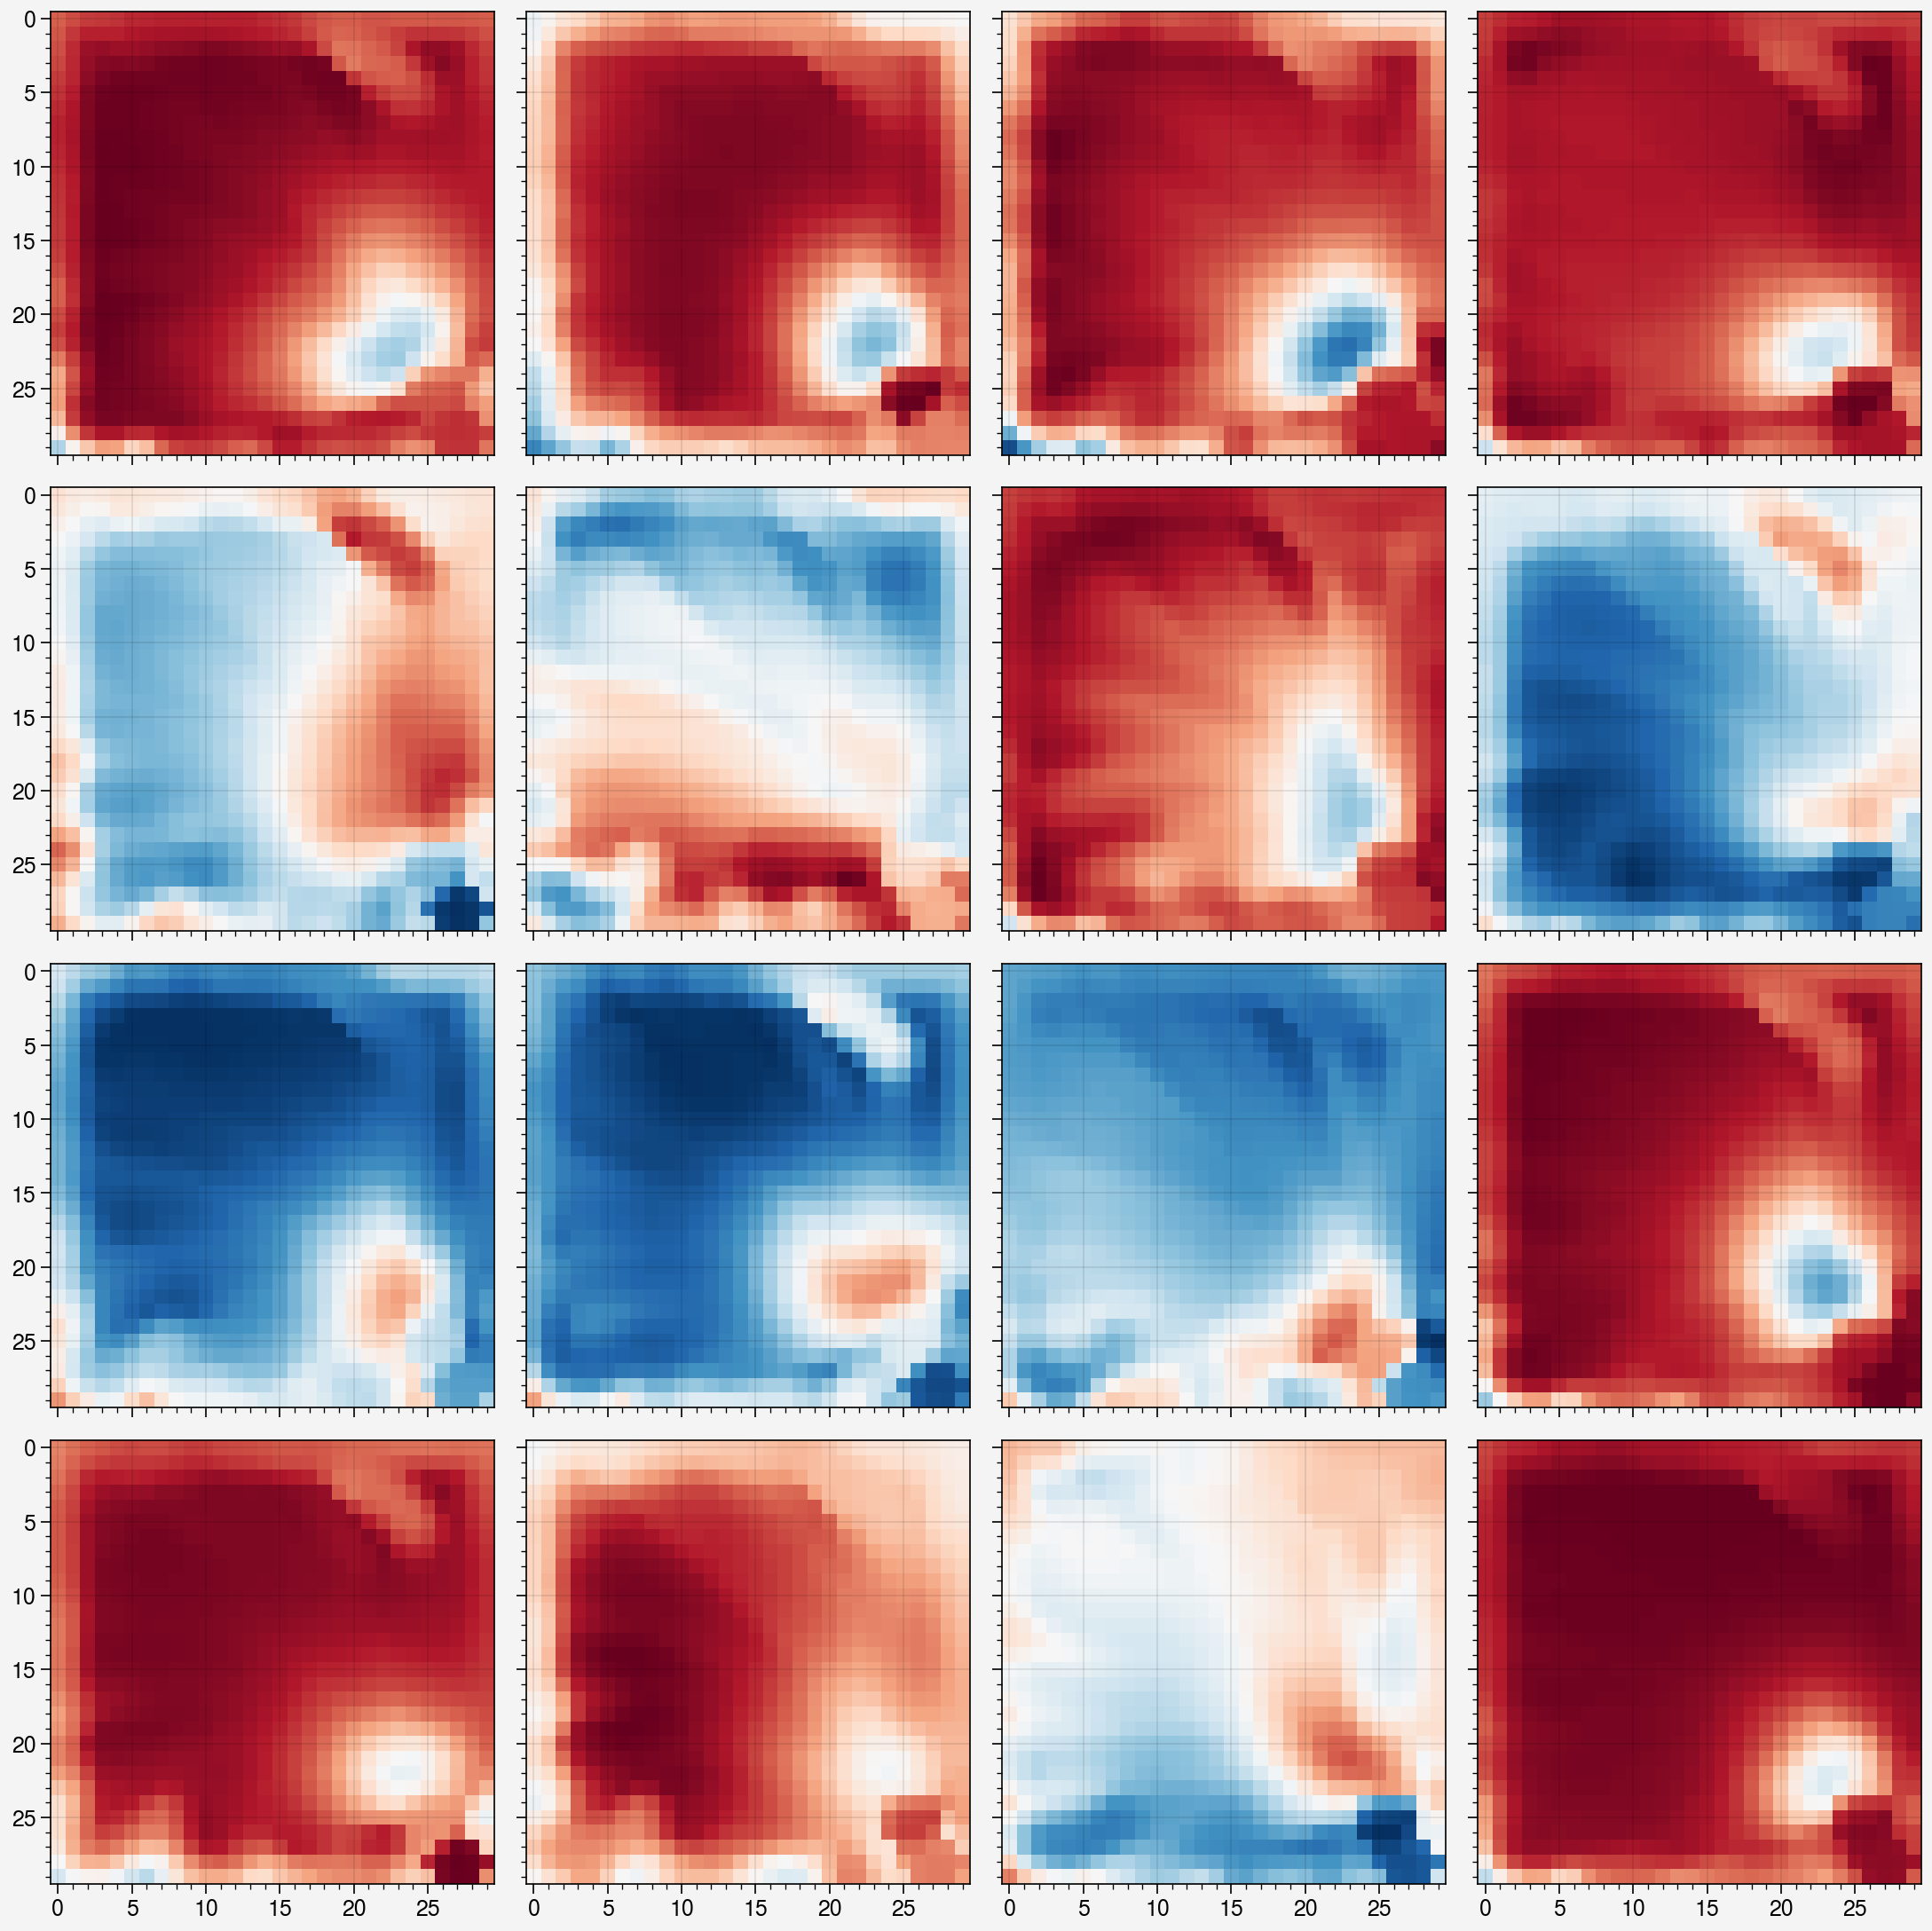

In [22]:
fig, ax = pplt.subplots(nrows=4, ncols=4)
for i in range(16):
    ax[i].imshow(hms[0][0][i])

In [6]:
def remaining_idxs(idxs, remove):
    remaining = []
    for idx in idxs:
        if idx not in remove:
            remaining.append(idx)
            
    return np.array(remaining)

# Testing random initiation heatmap collection

In [73]:
combined_actions, keep_start_points, keep_start_angles = pickle.load(open(f'data/pdistal_rim_heatmap/width64_comb_acts', 'rb'))
all_chks = {16: [0, 50, 100, 150, 300, 600, 1000, 1500],
            32: [0, 20, 40, 80, 150, 300, 600, 900]}

batch = 32
aux = 'none'

data_folder = 'data/pdistal_batchaux_heatmap_actor/'
checkpoint_folder = '../trained_models/checkpoint/nav_pdistal_batchaux/'
model_folder = 'nav_pdistal_batchaux/'
chks = all_chks[batch]

trial_name = f'nav_pdistal_batch{batch}aux{aux}'
trial = 0
chkp_val = 900

In [74]:
%%time
kwargs_name = f'../trained_models/ppo/{model_folder}{trial_name}_env'
kwargs = pickle.load(open(kwargs_name, 'rb'))

path = checkpoint_folder + f'{trial_name}_t{trial}'
checkpoint = Path(path)/f'{chkp_val}.pt'
model, obs_rms = torch.load(checkpoint)

all_ep = []
ep = forced_action_evaluate(model, obs_rms, seed=0, num_episodes=100, eval_log_dir='./',
                            env_kwargs=kwargs, data_callback=poster_data_callback,
                            with_activations=True)
    


CPU times: total: 2.72 s
Wall time: 3.34 s


In [65]:
ep.keys()

dict_keys(['obs', 'actions', 'rewards', 'hidden_states', 'dones', 'masks', 'envs', 'data', 'activations'])

In [75]:
eps = stack_all_ep([ep])

In [76]:
eps['activations'] = stack_activations(eps['activations'])

In [77]:
pickle.dump(eps, open(f'{data_folder}test', 'wb'))

In [78]:
pickle.dump([eps['activations']], open(f'{data_folder}test', 'wb'))

In [42]:
eps = clean_eps(ep, activations_key='actor_activations', activations_layer=1,
          save_inview=False, save_seen=False, prune_first=0)
# eps = clean_eps(ep, activations_key='shared_activations', activations_layer=0,
#           save_inview=False, save_seen=False)


p = eps['pos']
a = eps['activ']
heatmaps = []
for i in range(a.shape[1]):
    heatmap = gaussian_smooth(p, a[:, i], sigma=20)
    heatmaps.append(heatmap)
    
heatmaps_flat = np.array([h.reshape(-1) for h in heatmaps])
cs = cosine_similarity(heatmaps_flat)


idxs = np.arange(0, 16)
clusters = []

while len(idxs) > 0:
    remove_idxs = np.argwhere(np.abs(cs[idxs[0], idxs]) > 0.8).reshape(-1)
    cluster = idxs[remove_idxs]
    clusters.append(cluster)
    
    idxs = remaining_idxs(idxs, cluster)

    if len(clusters) > 16:
        break
        
print(len(clusters))

6


In [33]:
stacked = stack_activations(ep['activations'])

In [35]:
pickle.dump(stacked, open('data/pdistal_batchaux_heatmap_actor/test', 'wb'))

In [38]:
stacked['shared_activations'].shape

torch.Size([1, 4011, 16])

In [ ]:
for key in stacked:
    for 

In [26]:
eps.keys()

dict_keys(['pos', 'activ', 'pinview', 'pseen', 'angles', 'dones', 'actions'])

In [32]:
pickle.dump([eps['pos'], eps['activ']], open('data/pdistal_batchaux_heatmap_actor/test', 'wb'))

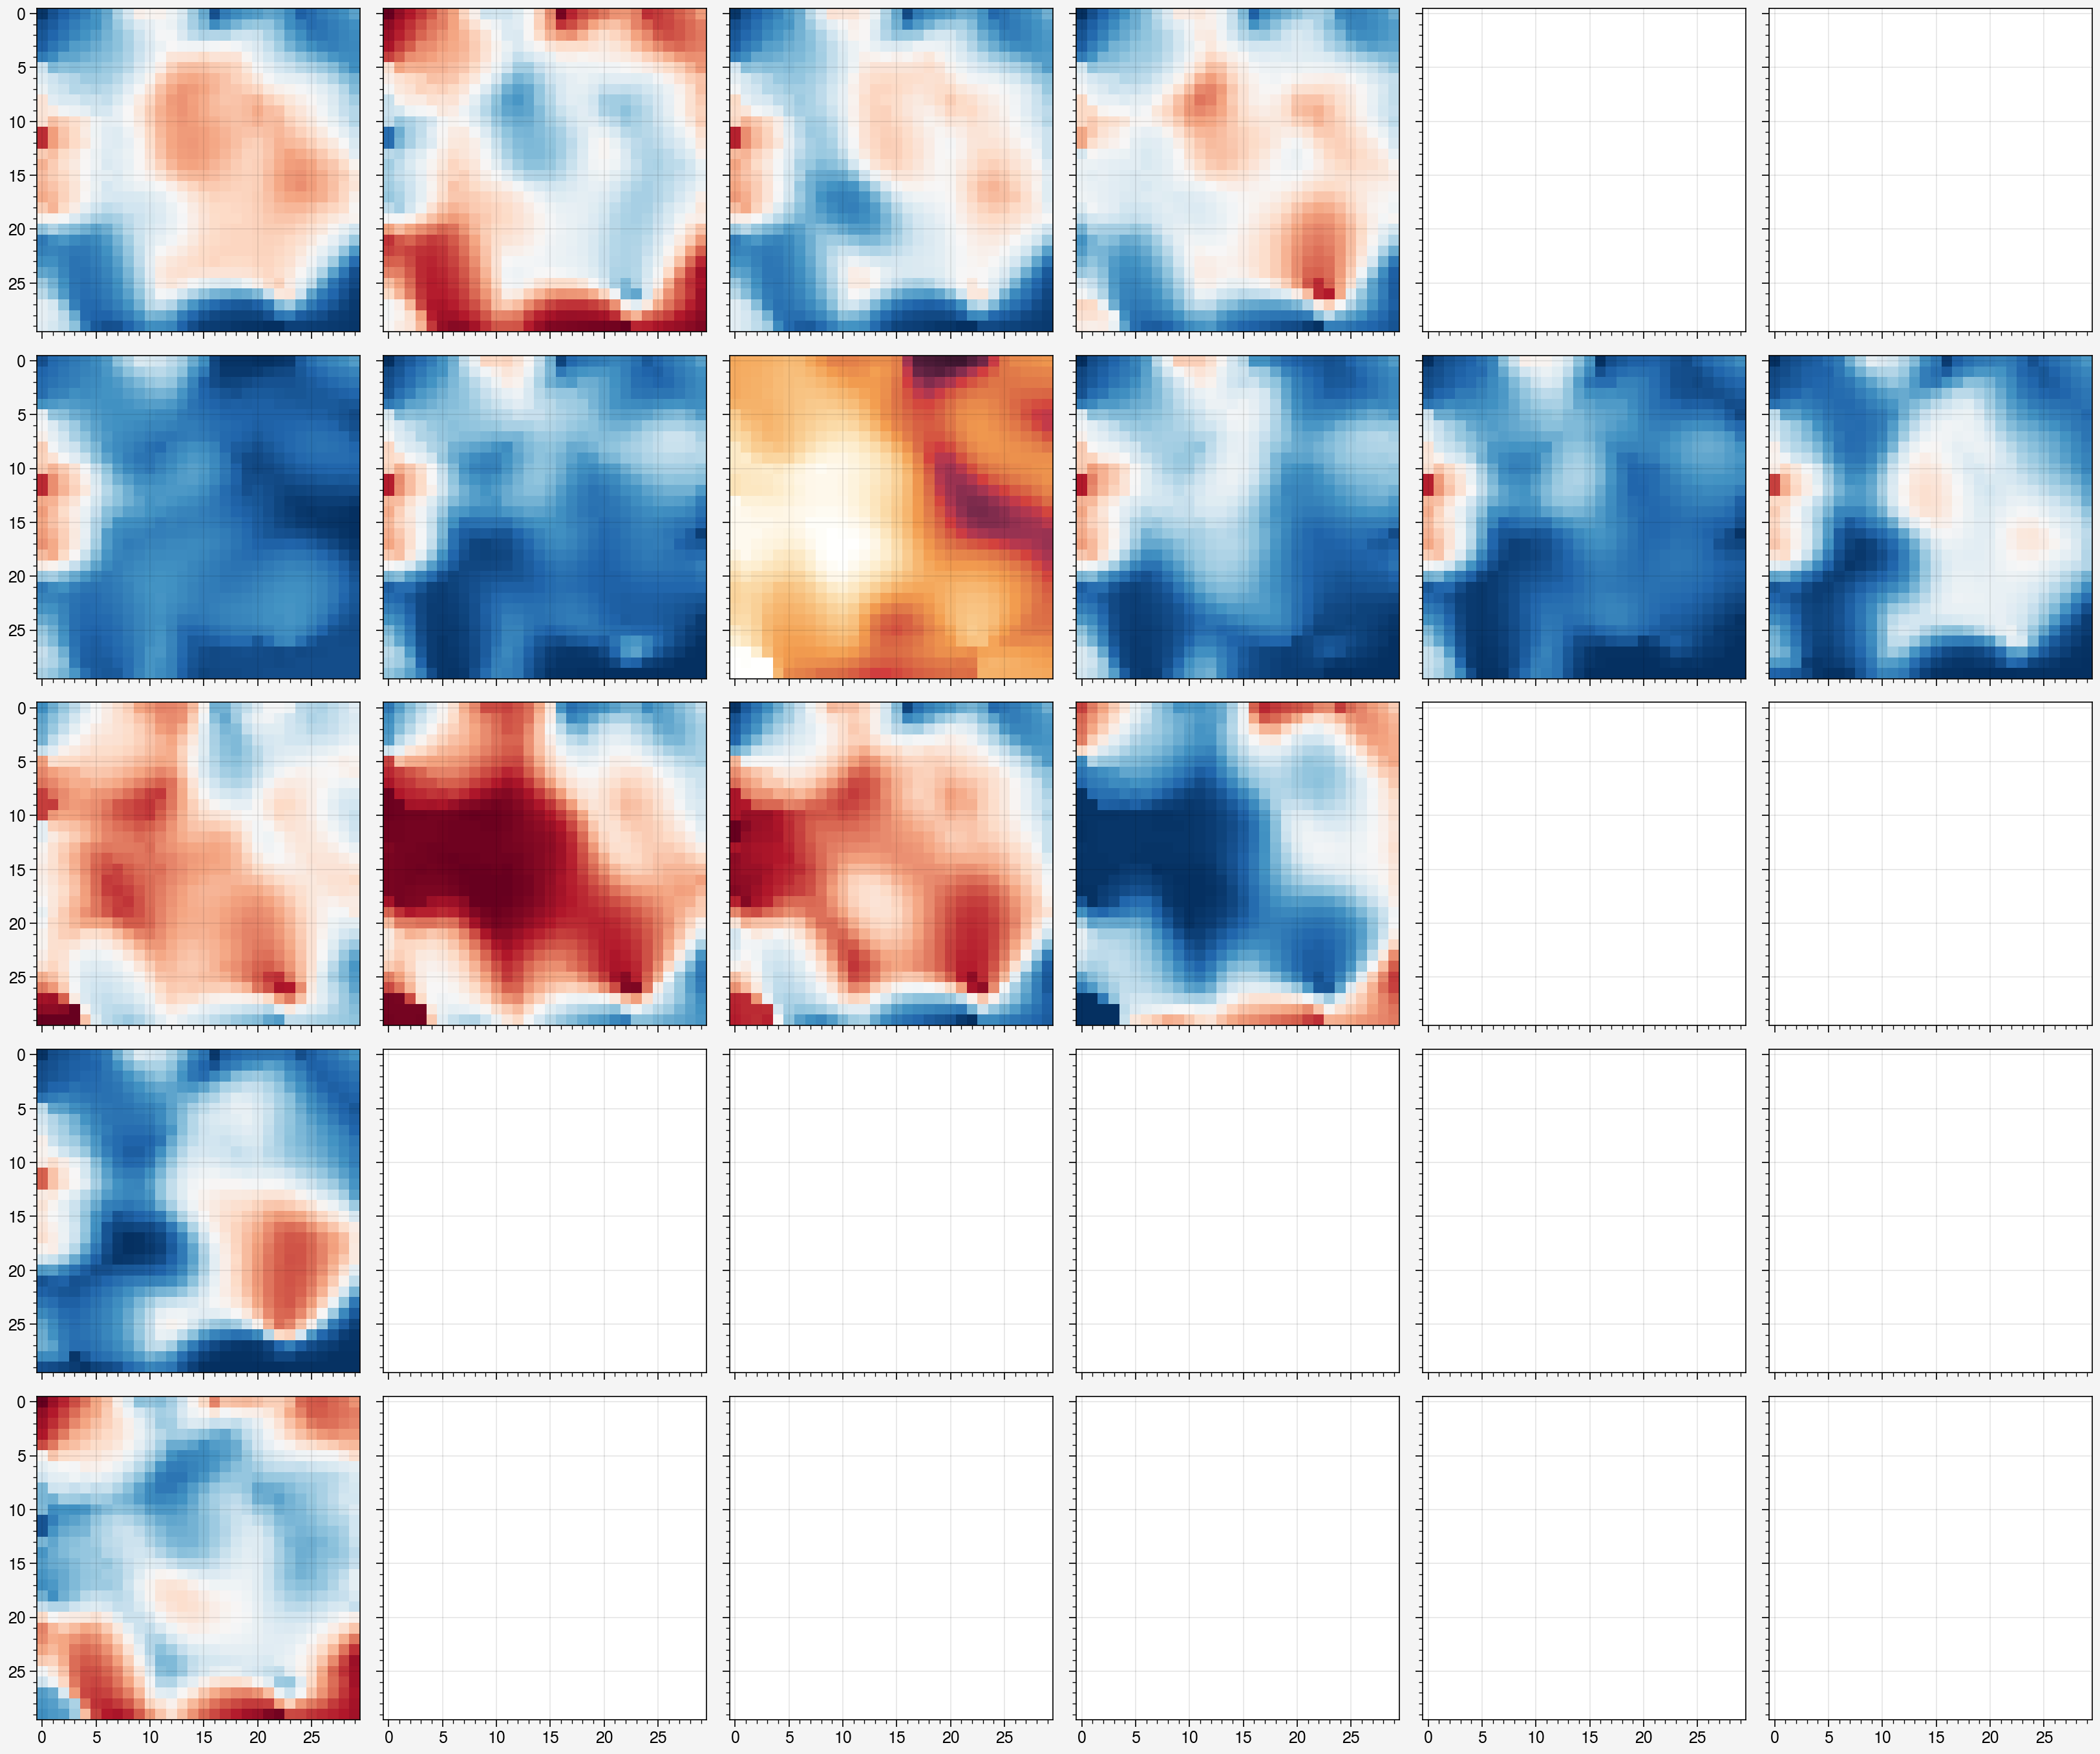

In [39]:
max_cluster_len = max([len(c) for c in clusters])
fig, ax = pplt.subplots(nrows=len(clusters), ncols=max_cluster_len)

for i, c in enumerate(clusters):
    for j, idx in enumerate(c):
        ax[i, j].imshow(heatmaps[idx])

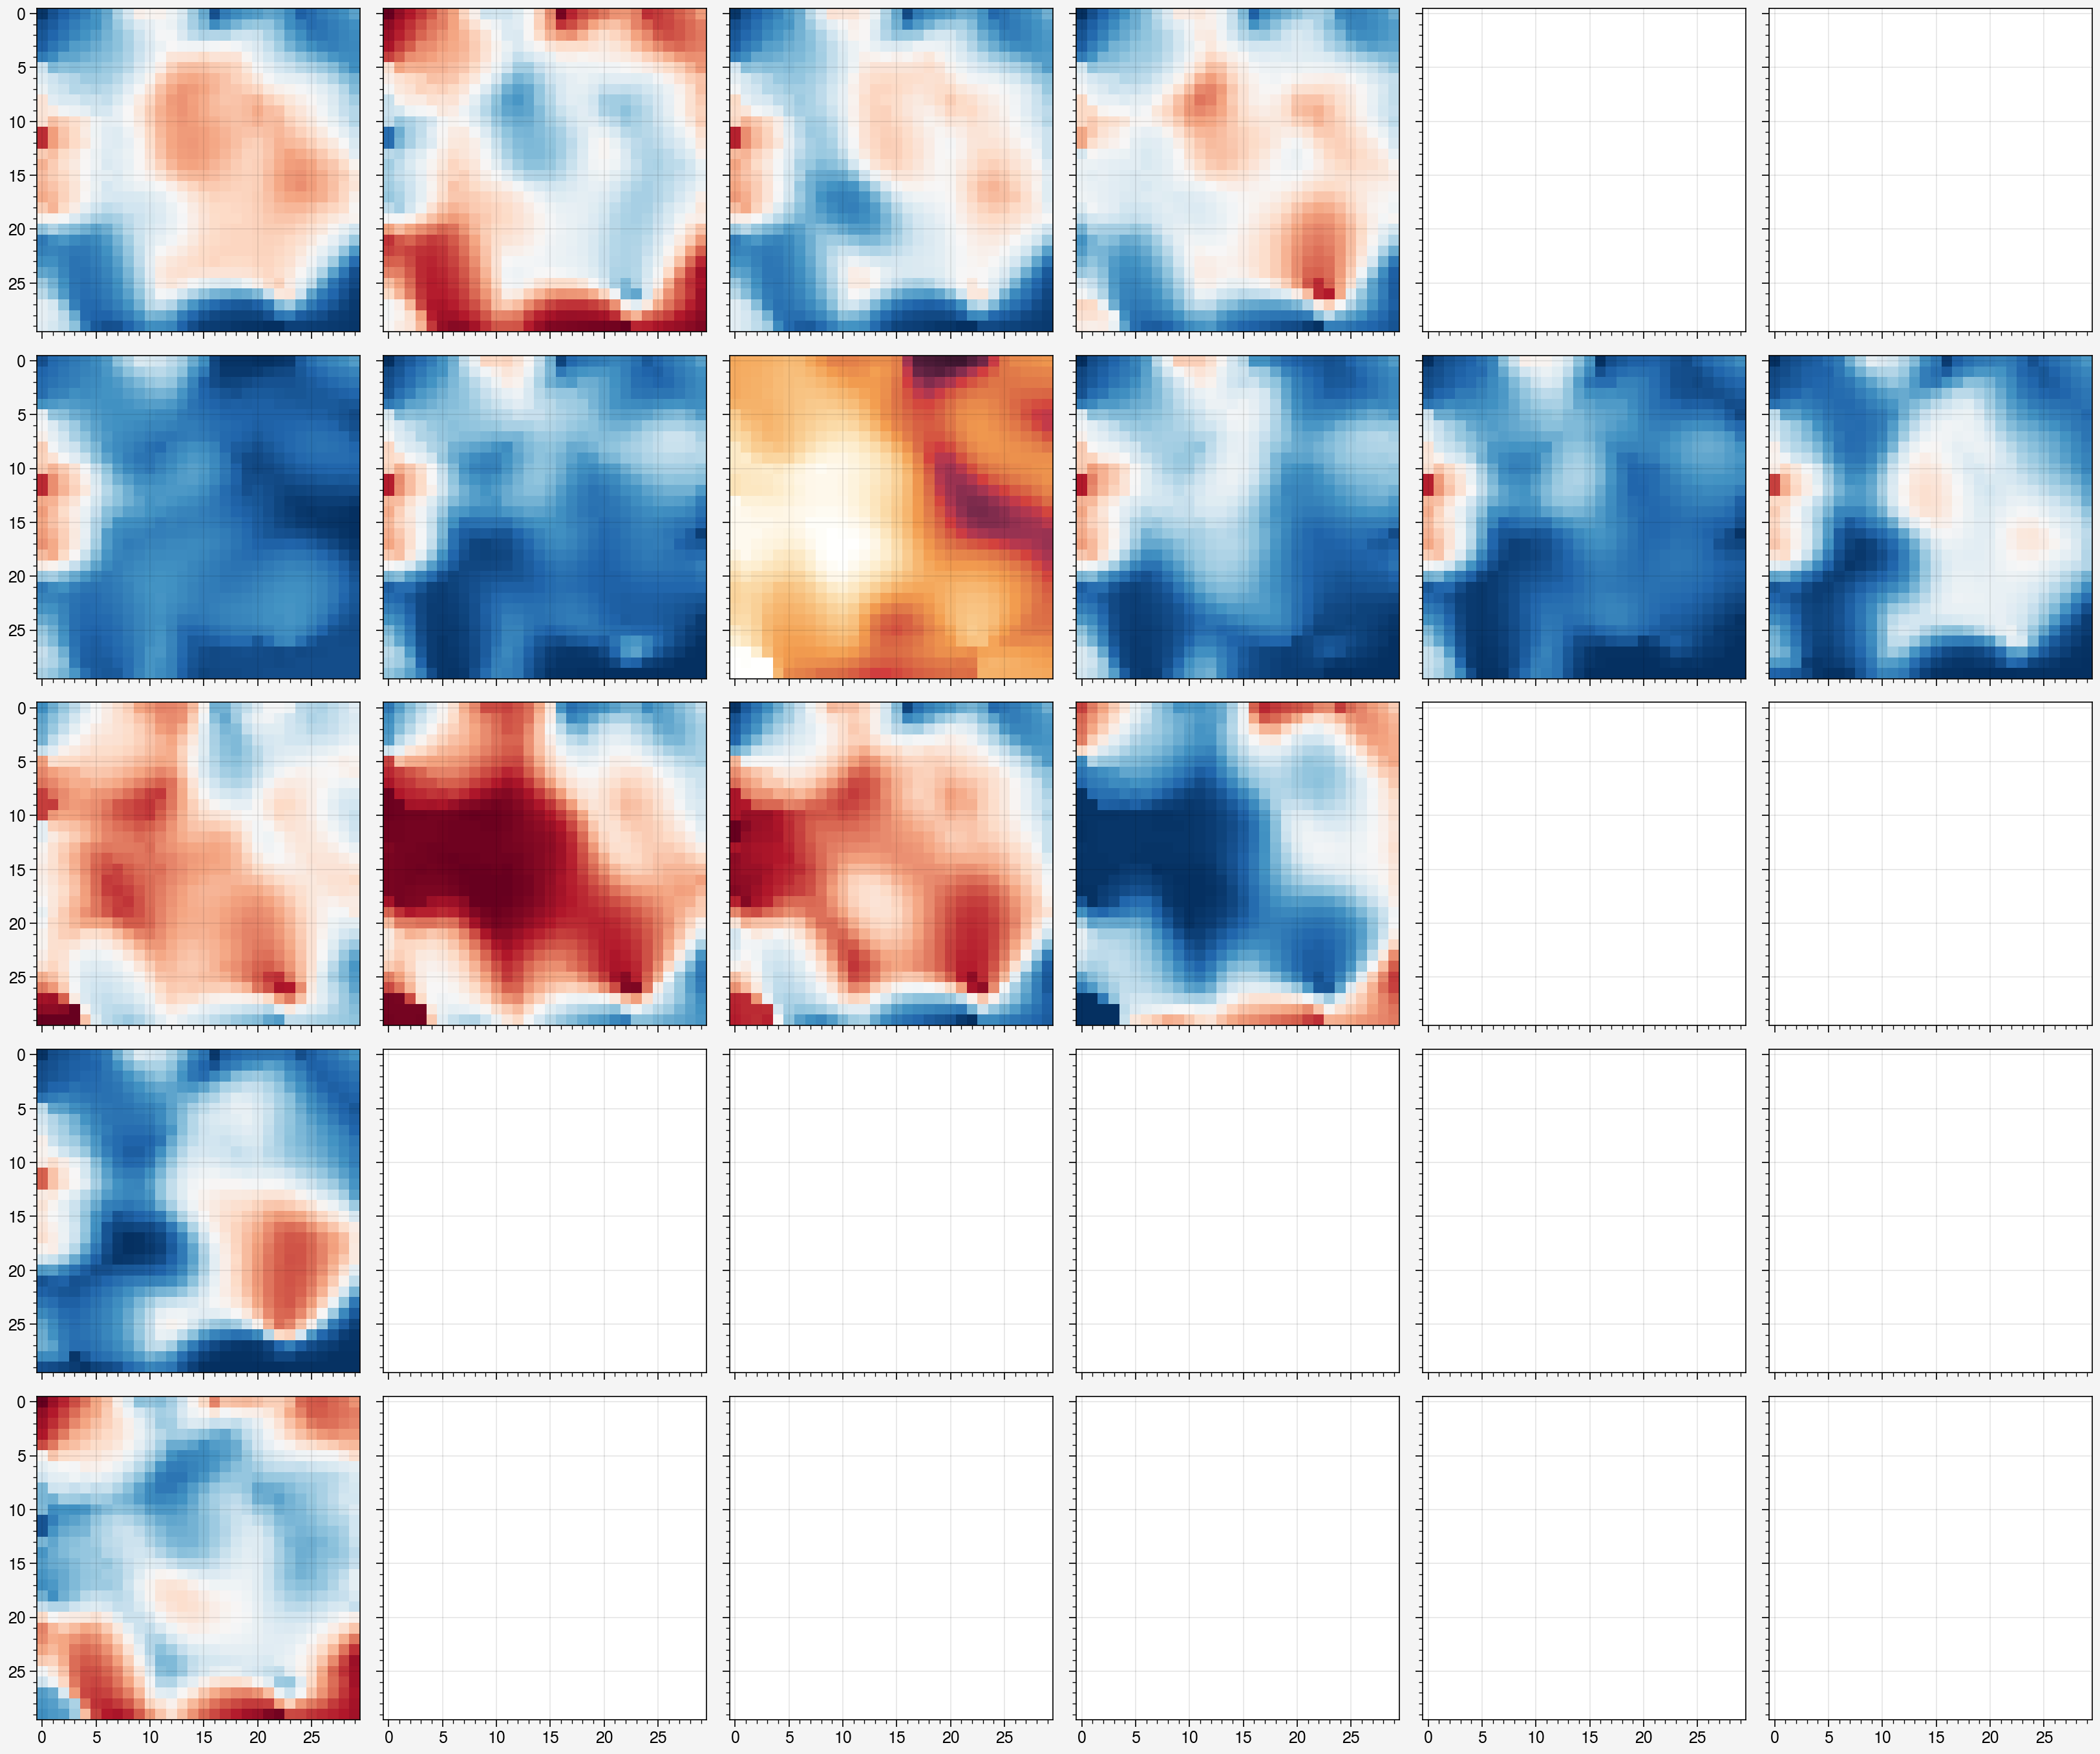

In [41]:
max_cluster_len = max([len(c) for c in clusters])
fig, ax = pplt.subplots(nrows=len(clusters), ncols=max_cluster_len)

for i, c in enumerate(clusters):
    for j, idx in enumerate(c):
        ax[i, j].imshow(heatmaps[idx])

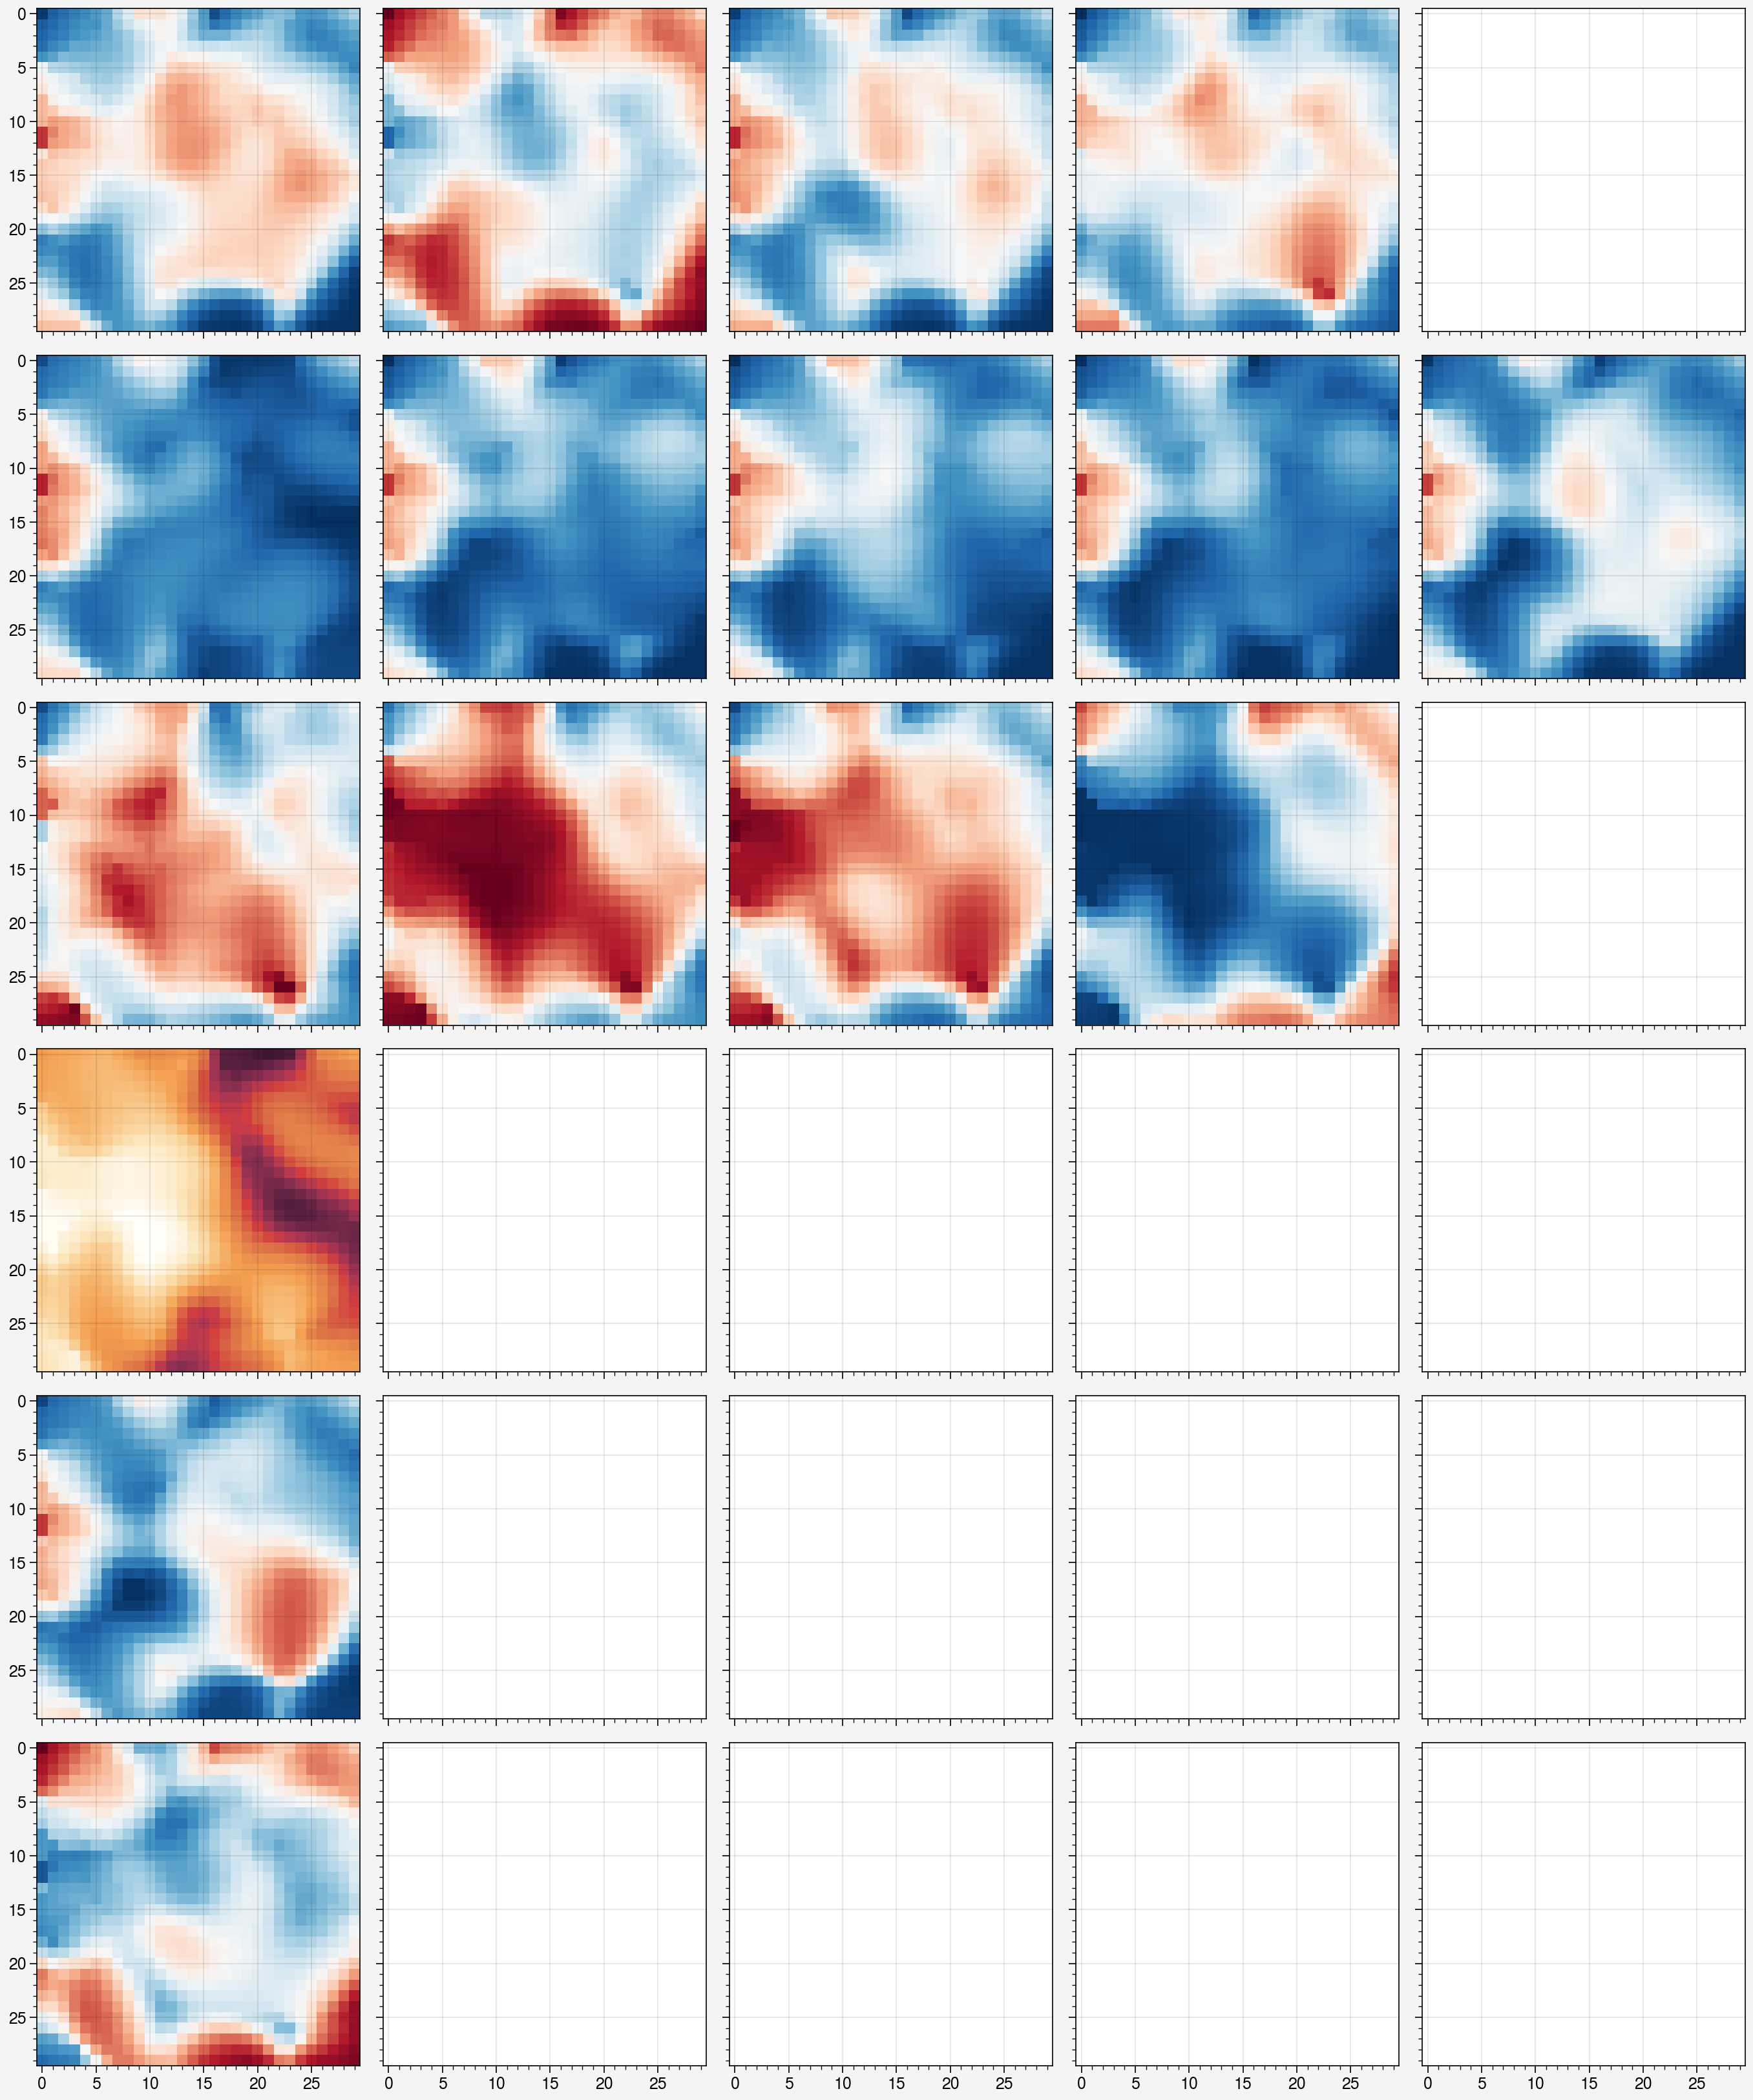

In [43]:
max_cluster_len = max([len(c) for c in clusters])
fig, ax = pplt.subplots(nrows=len(clusters), ncols=max_cluster_len)

for i, c in enumerate(clusters):
    for j, idx in enumerate(c):
        ax[i, j].imshow(heatmaps[idx])

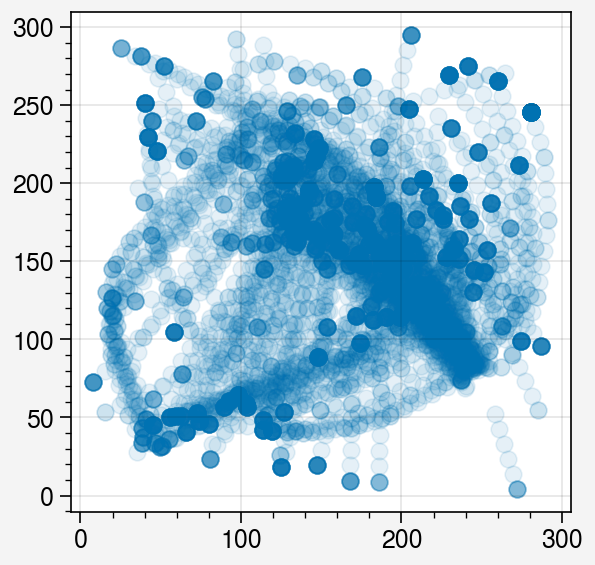

In [55]:
fig, ax = pplt.subplots()
ax.scatter(eps['pos'].T[0], eps['pos'].T[1], alpha=0.1)

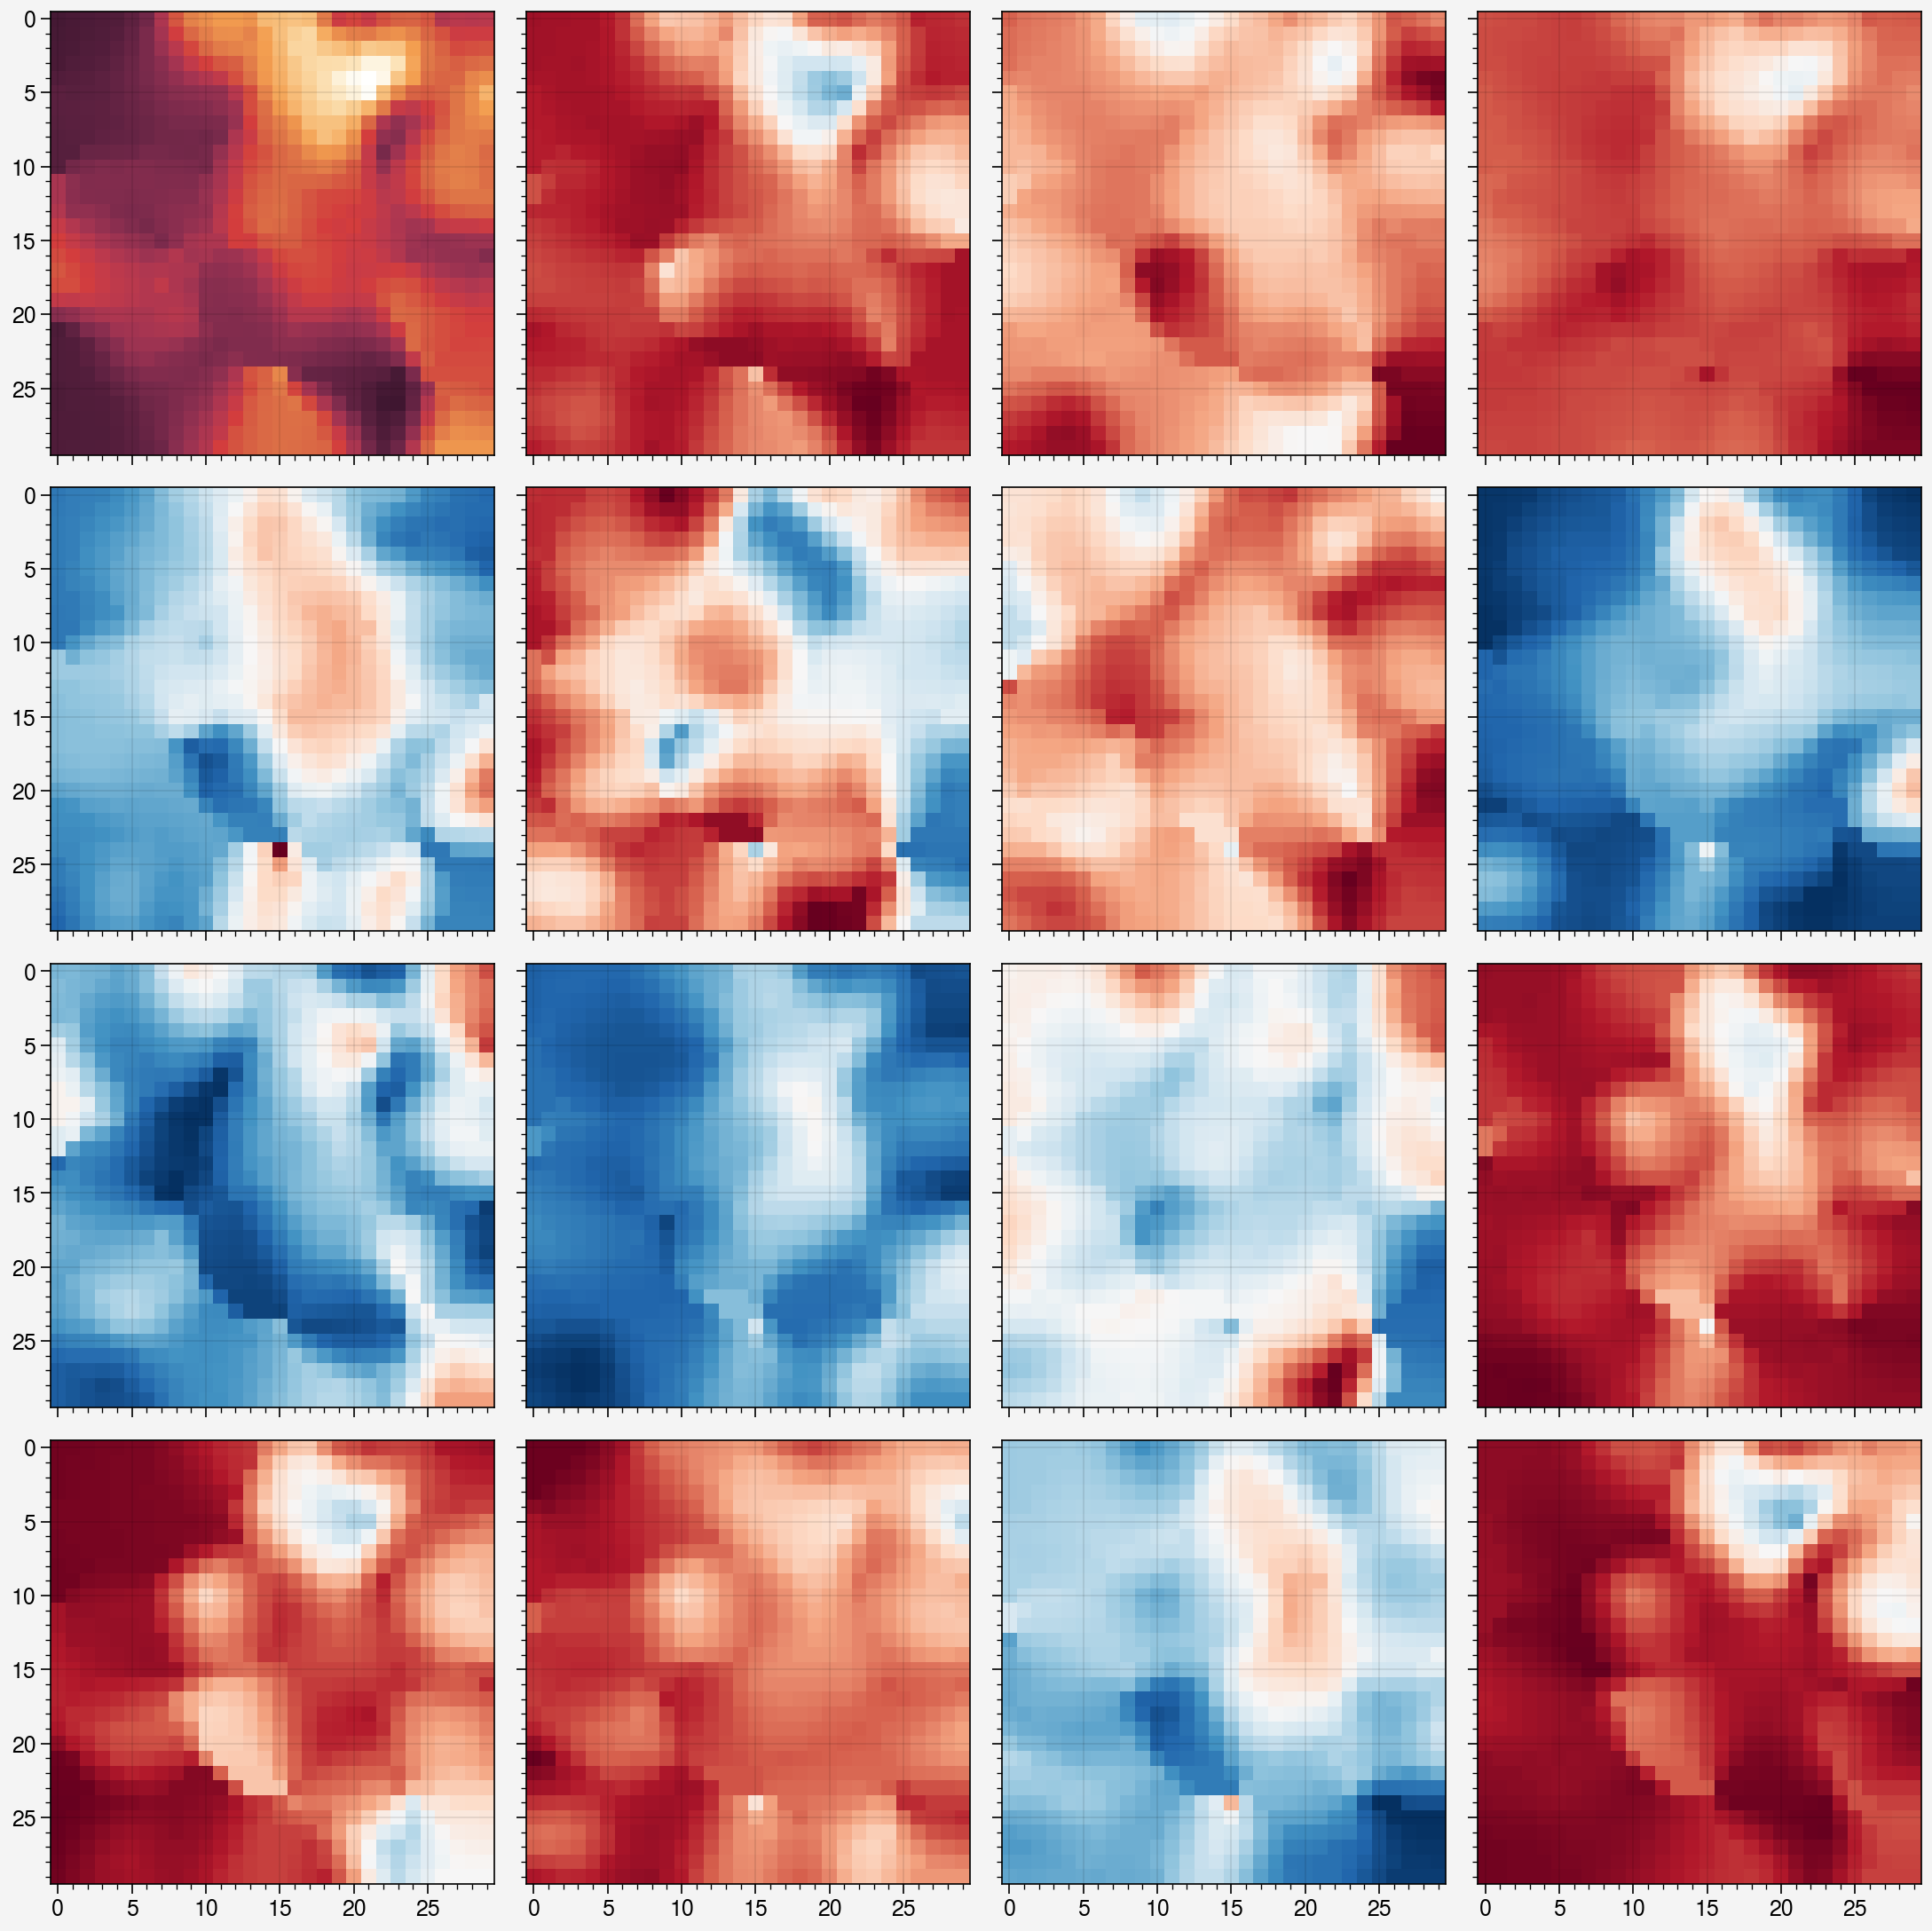

In [234]:
fig, ax = pplt.subplots(nrows=4, ncols=4)
for i in range(16):
    ax[i].imshow(heatmaps[i])

In [75]:
import scipy.cluster.hierarchy as sch

def hierarchical_cluster(cs):
    pairwise_dists = sch.distance.pdist(cs)
    linkage = sch.linkage(pairwise_dists, method='complete')
    cluster_distance_threshold = pairwise_dists.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, criterion='distance')
    idxs = np.argsort(idx_to_cluster_array)
    
    return idxs

In [231]:
heatmaps_flat = np.array([h.reshape(-1) for h in heatmaps])
idxs = hierarchical_cluster(heatmaps_flat)
heatmaps_flat = heatmaps_flat[idxs]

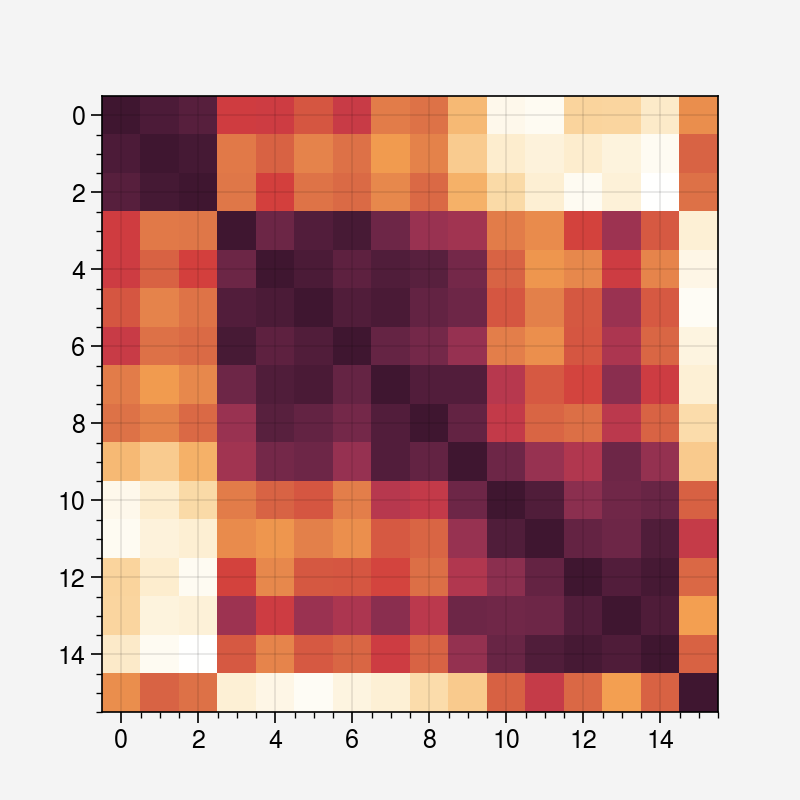

In [78]:
plt.imshow(cosine_similarity(heatmaps_flat))

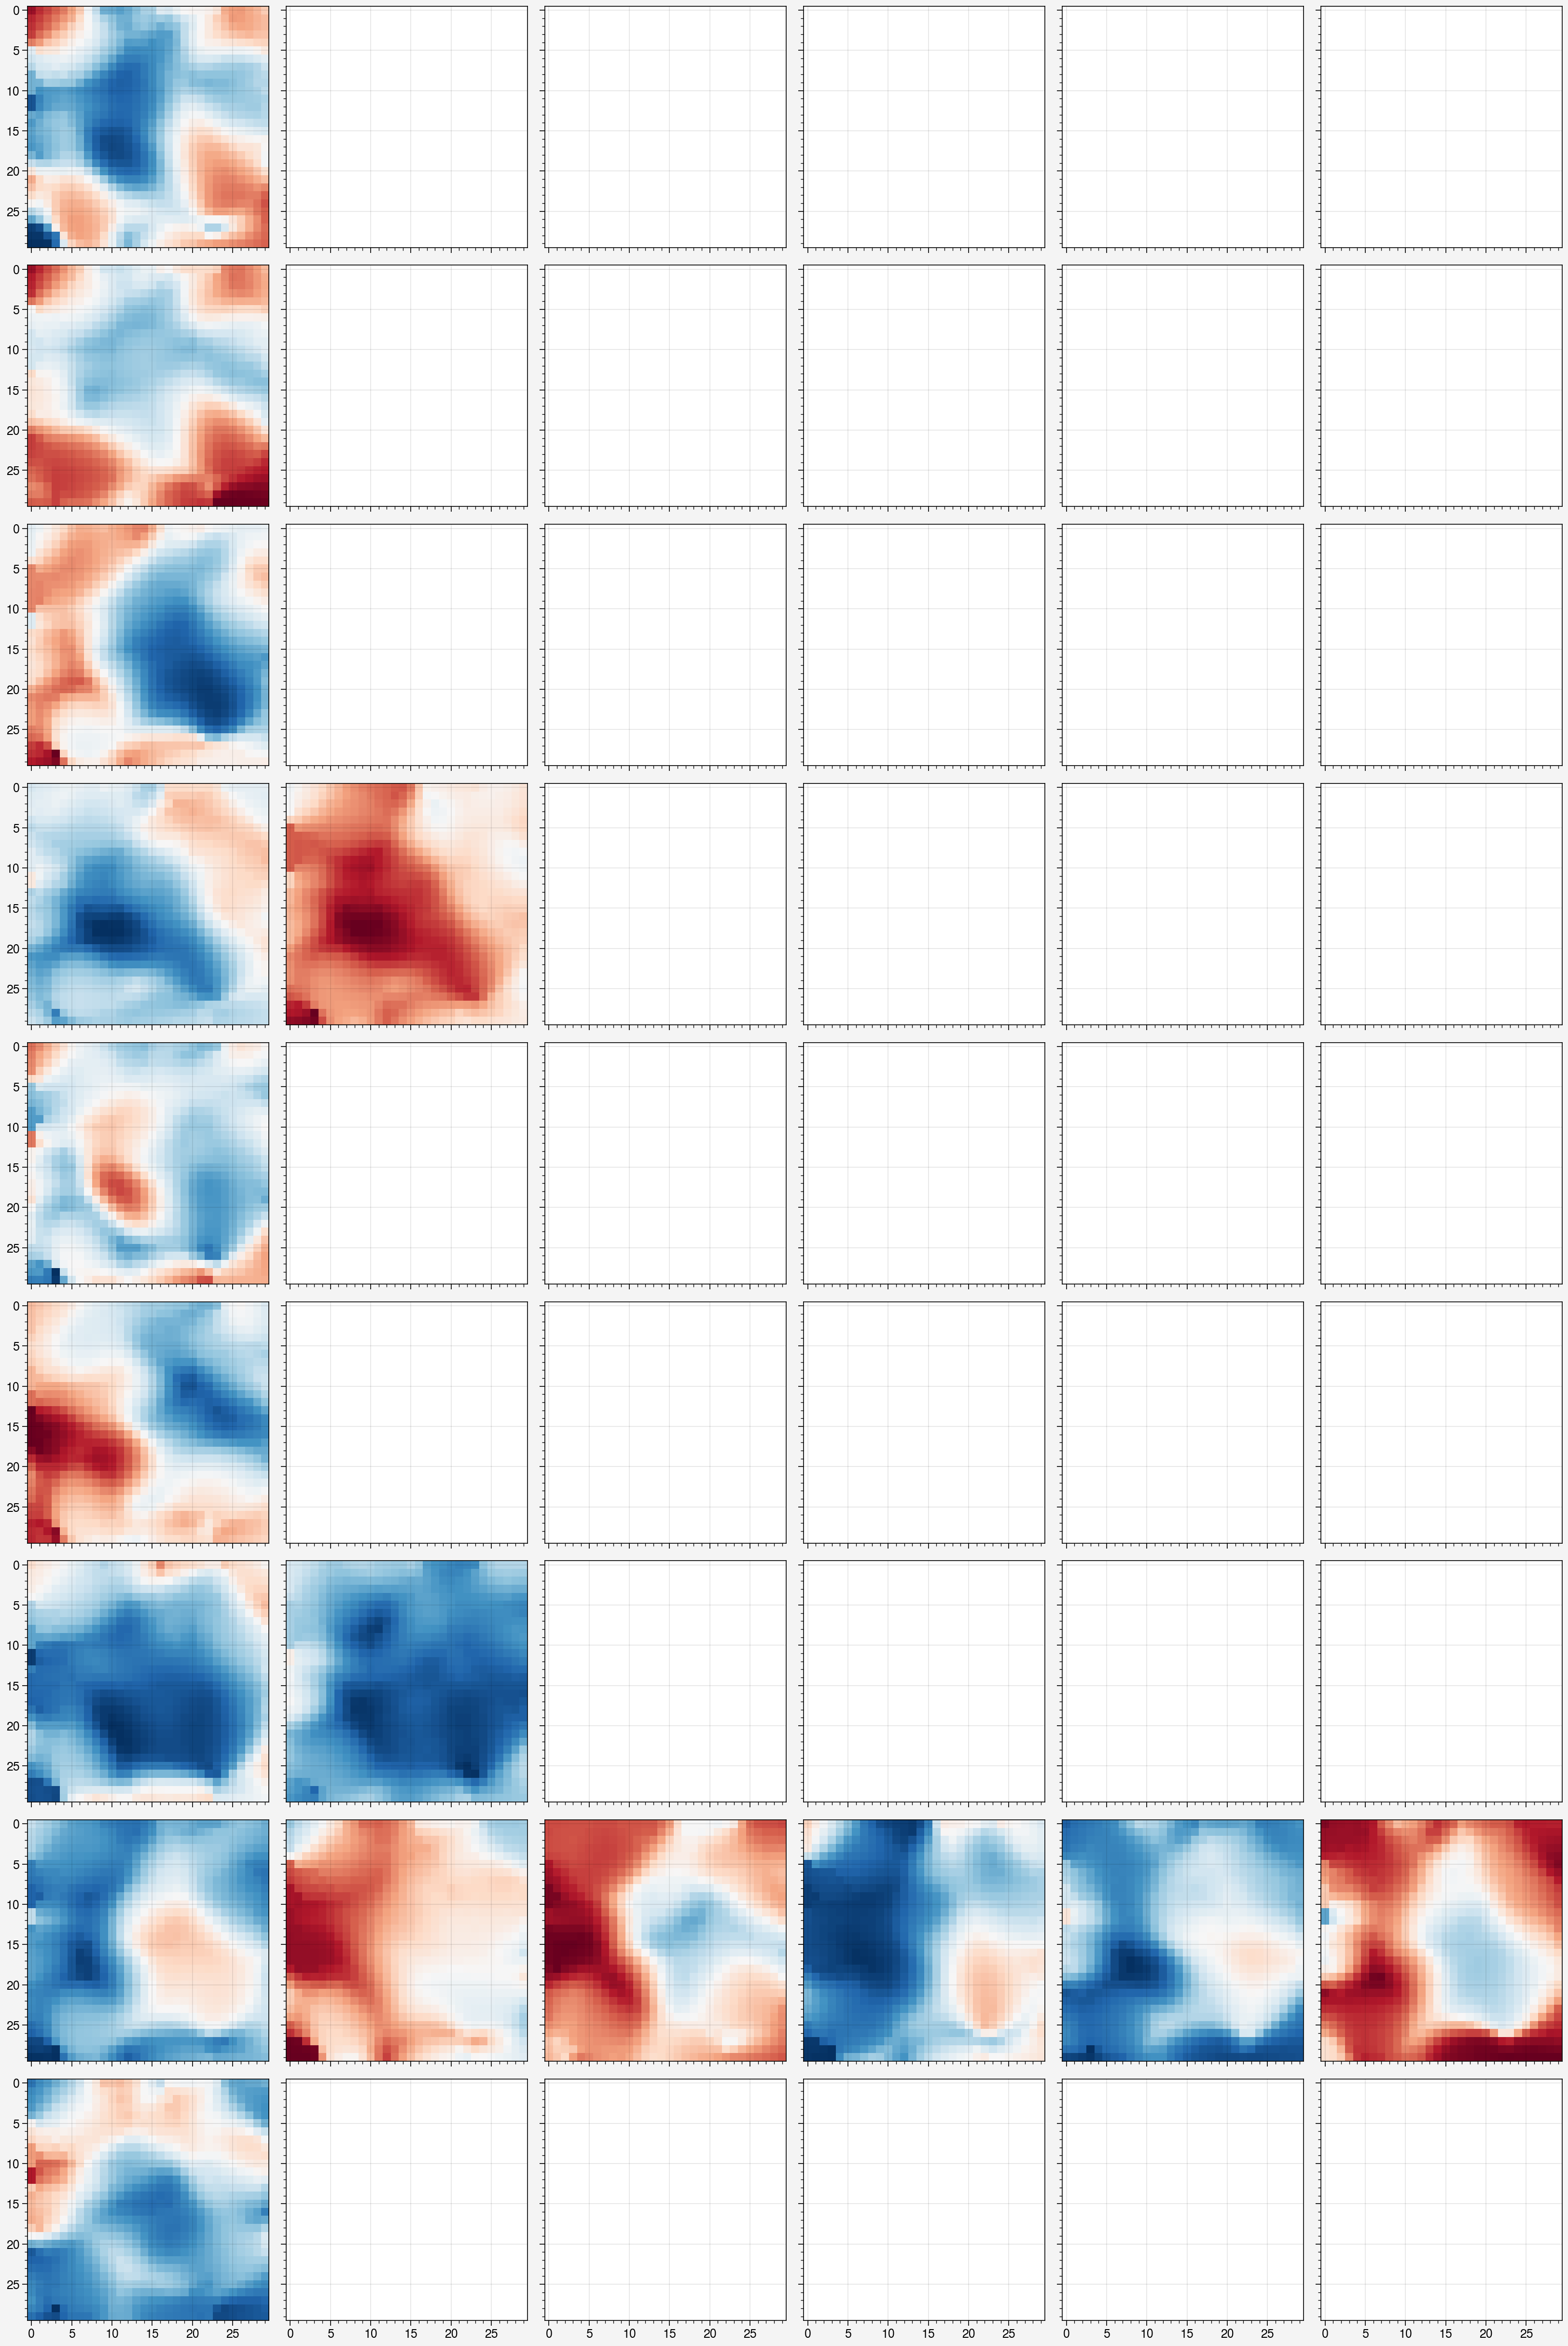

In [17]:
max_cluster_len = max([len(c) for c in clusters])
fig, ax = pplt.subplots(nrows=len(clusters), ncols=max_cluster_len)

for i, c in enumerate(clusters):
    for j, idx in enumerate(c):
        ax[i, j].imshow(heatmaps[idx])

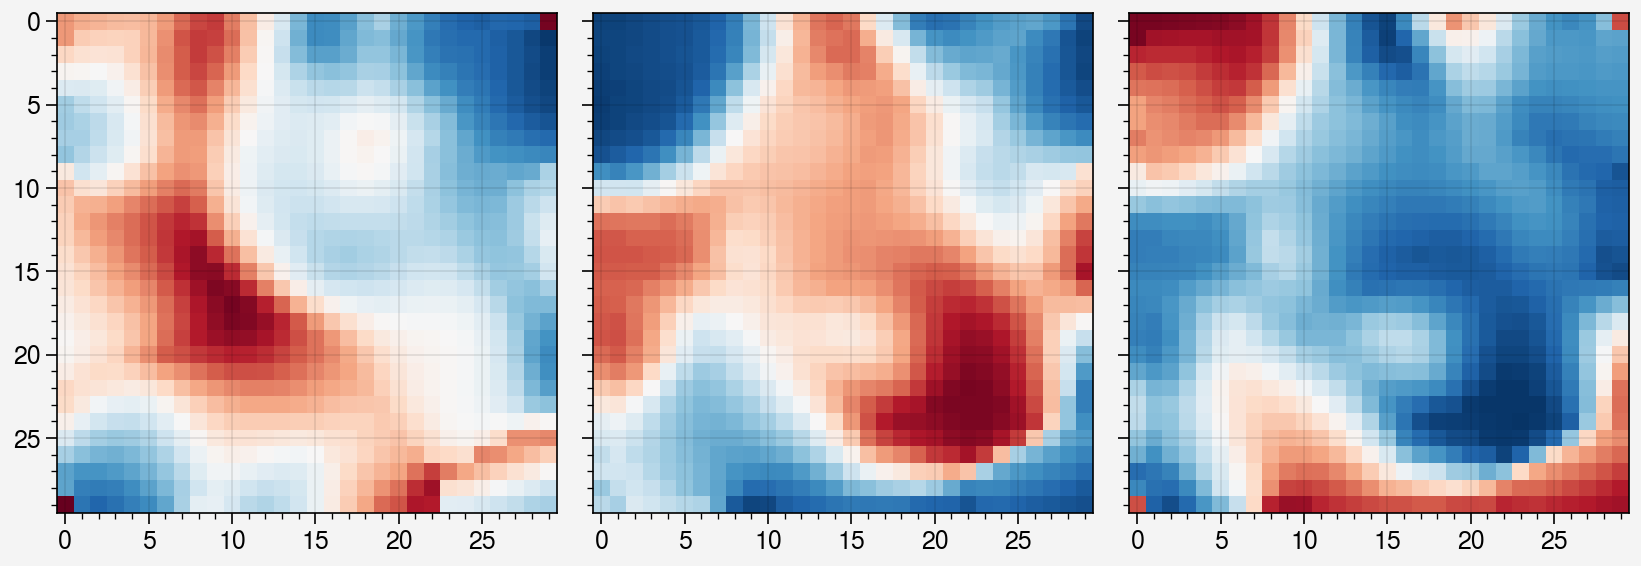

In [178]:
fig, ax = pplt.subplots(ncols=3)
ax[0].imshow(heatmaps[0], vmin=-1, vmax=1)
ax[1].imshow(heatmaps[7], vmin=-1, vmax=1)
ax[2].imshow(heatmaps[8], vmin=-1, vmax=1)


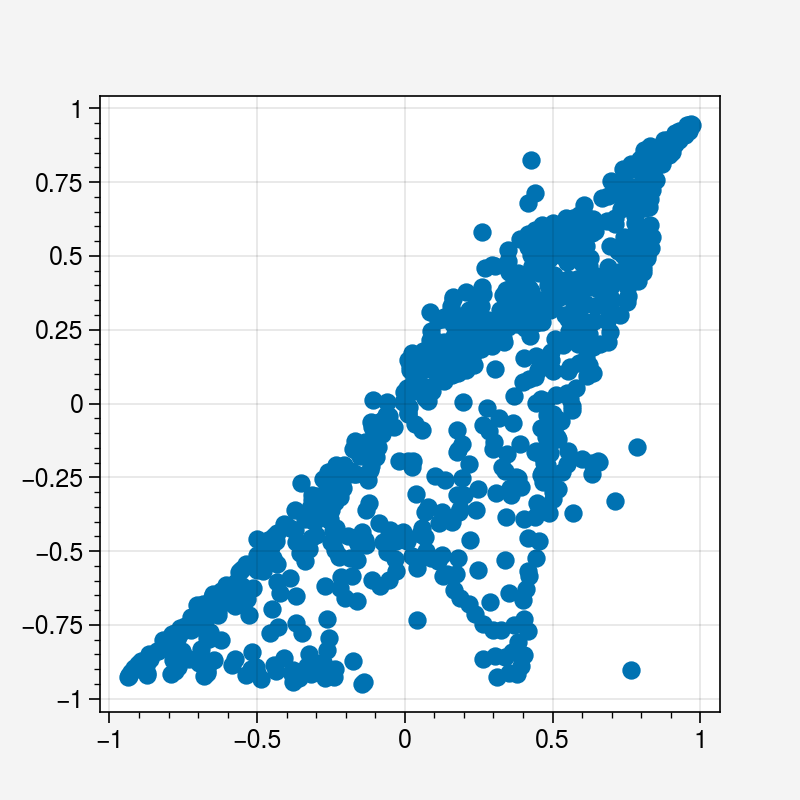

In [217]:
plt.scatter(heatmaps_flat[11], heatmaps_flat[12])

In [206]:
cs = np.corrcoef(heatmaps_flat, heatmaps_flat)

idxs = np.arange(0, 16)
clusters = []

while len(idxs) > 0:
    remove_idxs = np.argwhere(np.abs(cs[idxs[0], idxs]) > 0.8).reshape(-1)
    cluster = idxs[remove_idxs]
    clusters.append(cluster)
    
    idxs = remaining_idxs(idxs, cluster)

    if len(clusters) > 16:
        break

In [207]:
clusters

[array([ 0,  1,  2, 10, 11, 12, 14]),
 array([ 3,  4,  5,  6,  7, 15]),
 array([8]),
 array([9]),
 array([13])]

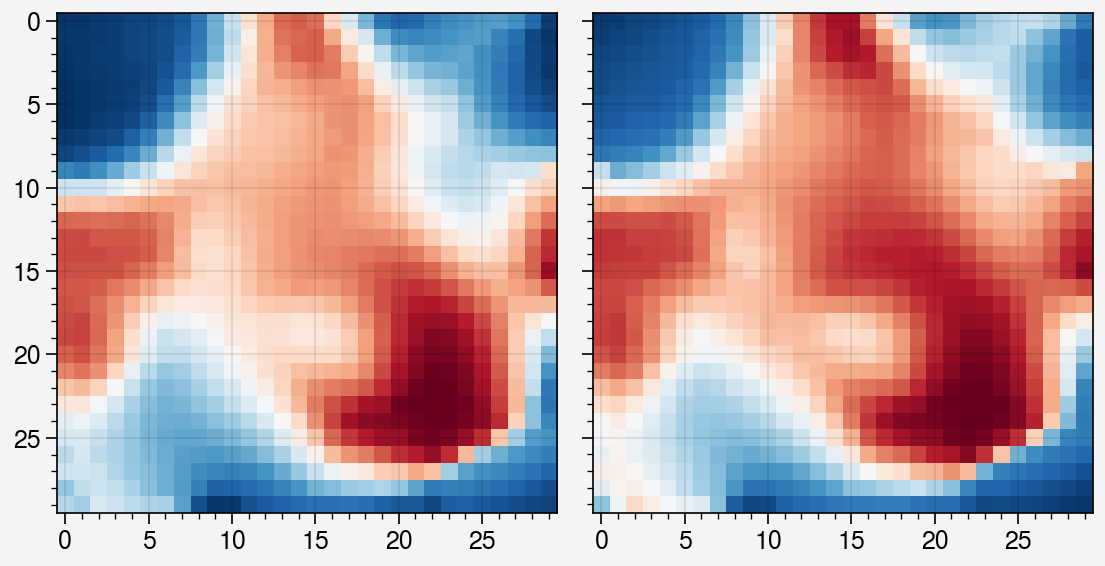

In [213]:
fig, ax = pplt.subplots(ncols=2)
ax[0].imshow(heatmaps[7])
ax[1].imshow(heatmaps[11])

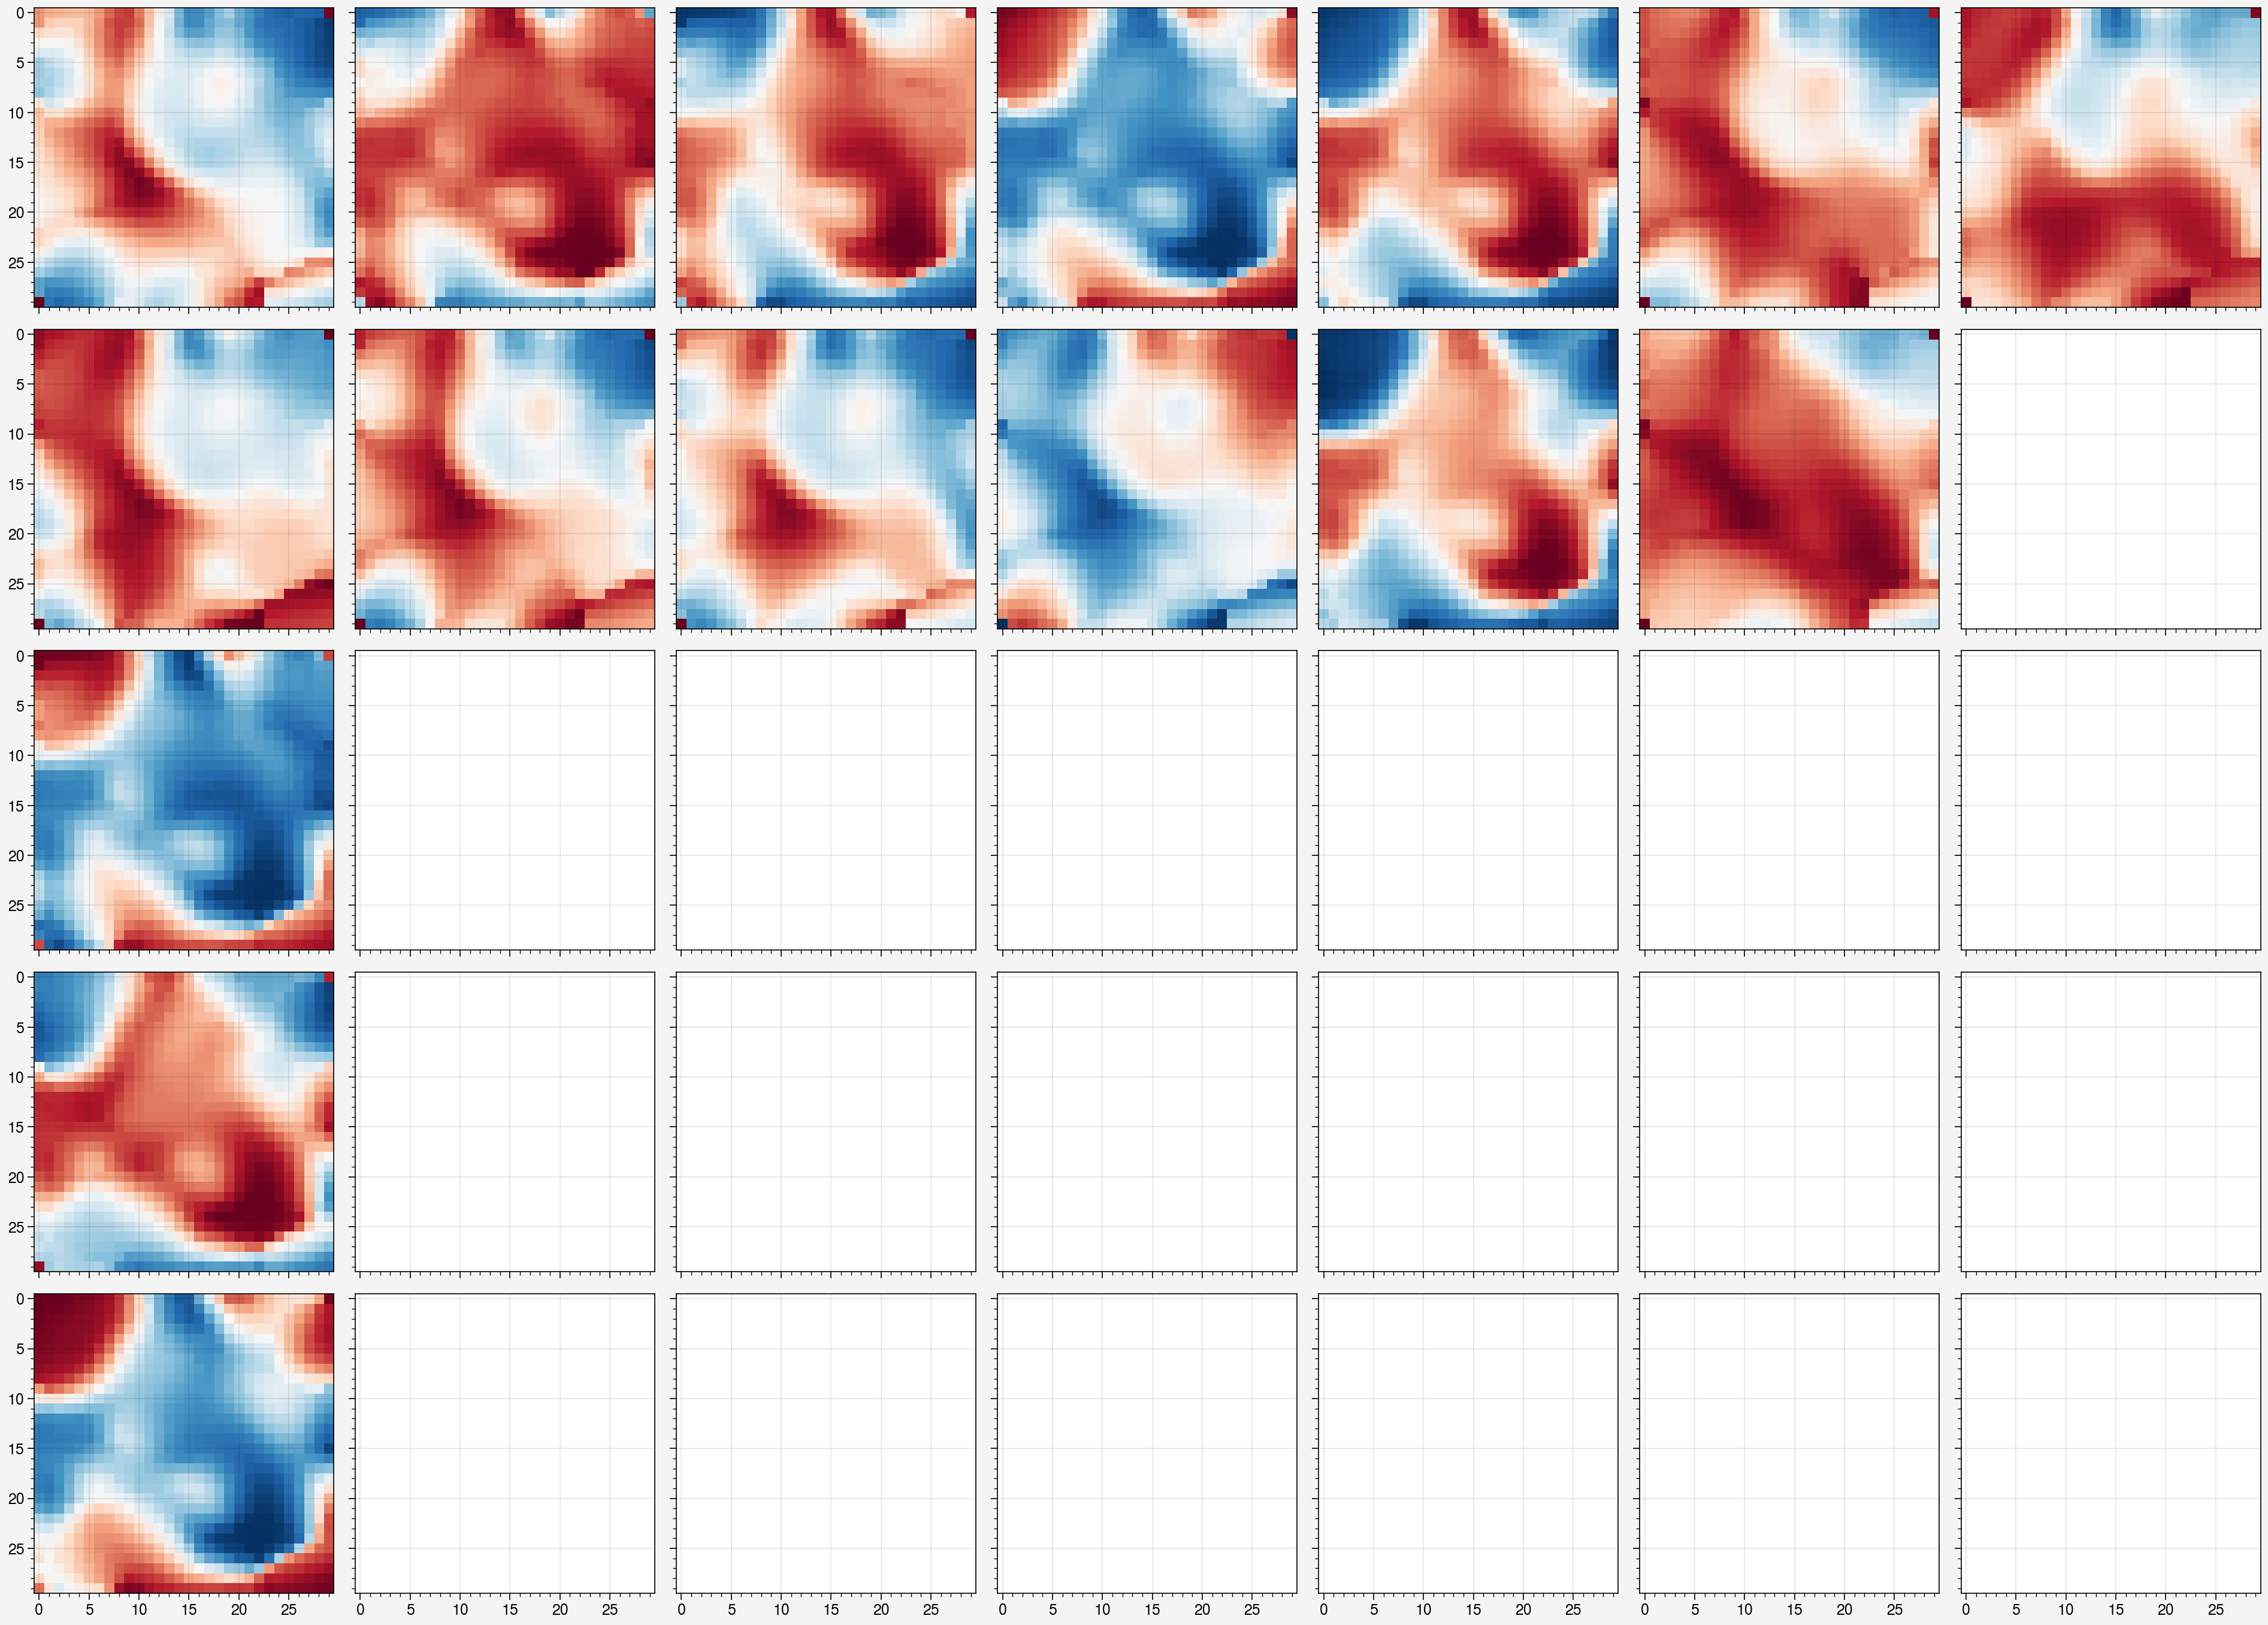

In [208]:
max_cluster_len = max([len(c) for c in clusters])
fig, ax = pplt.subplots(nrows=len(clusters), ncols=max_cluster_len)

for i, c in enumerate(clusters):
    for j, idx in enumerate(c):
        ax[i, j].imshow(heatmaps[idx])

In [198]:
r2_score(heatmaps_flat[10], heatmaps_flat[0])

-7.533501812480539

# Computing heatmaps from saved data

In [86]:
batch = 32
aux = 'goaldistcoef1'
data_folder = 'data/pdistal_batchaux_heatmap_actor/'
data = pickle.load(open(f'{data_folder}nav_pdistal_batch{batch}aux{aux}_checkpoint', 'rb'))

In [99]:
data['copied'][2].keys()

dict_keys([0, 20, 40, 80, 150, 300, 600, 900])

In [113]:
data['random'][2][900]['data']['pos']

array([[135.77042279, 214.34193847],
       [145.77042021, 214.34912485],
       [155.77041763, 214.35631123],
       ...,
       [224.82755083,  65.2157845 ],
       [234.74215241,  66.51988399],
       [177.01346568,  95.18279261]])

In [ ]:
data

In [120]:
activ_types = ['shared_activations', 'actor_activations', 'critic_activations']
trial = 0
chk = 900

activ_heatmaps = {}

for activ_type in activ_types:
    activ_heatmaps[activ_type.split('_')[0]] = []
    
    activ = data['random'][trial][chk]['activations'][activ_type]
    p = data['random'][trial][chk]['data']['pos']
    
    num_layers = activ.shape[0]
    
    for layer in tqdm(range(num_layers)):
        a = activ[layer]
        heatmaps = []
        for i in range(a.shape[1]):
            heatmap = gaussian_smooth(p, a[:, i])
            heatmaps.append(heatmap)
            
        activ_heatmaps[activ_type.split('_')[0]].append(heatmaps)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.86s/it]


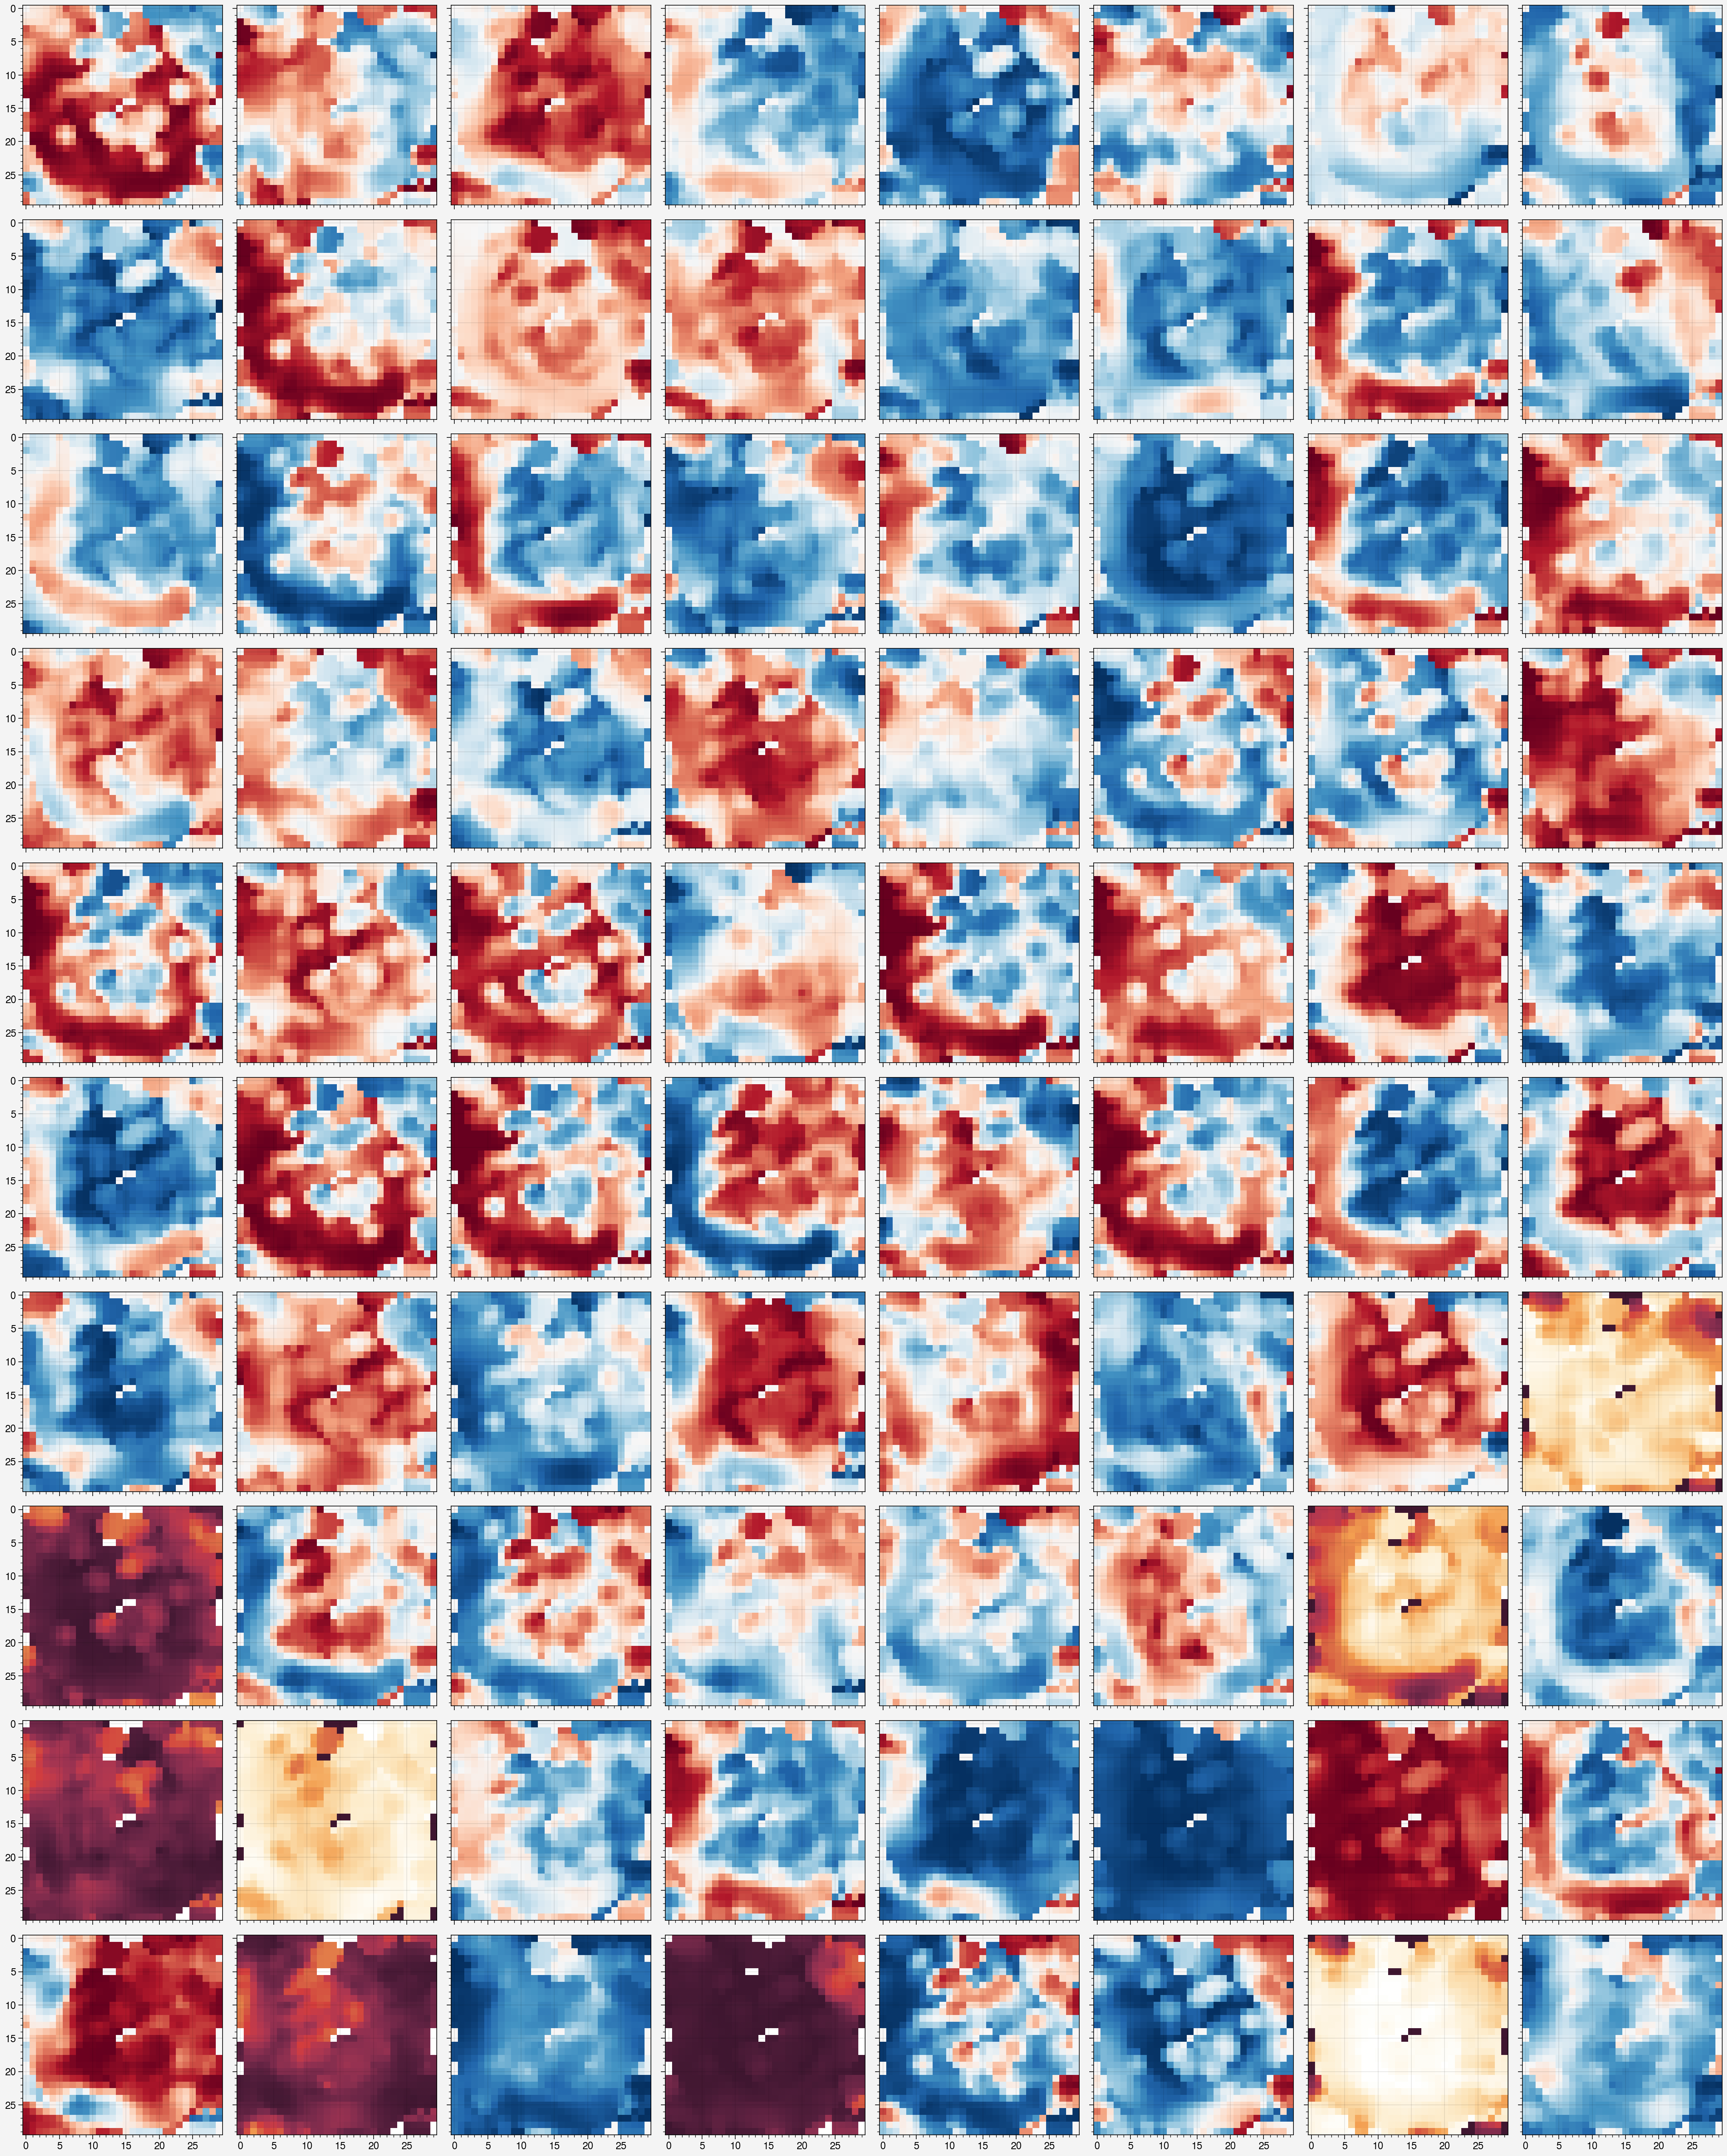

In [121]:
fig, ax = pplt.subplots(ncols=8, nrows=10)

activ_types = ['shared', 'actor', 'critic']

cur_row = 0
for a in activ_types:
    hms = activ_heatmaps[a]
    for i in range(len(hms)):
        for j, hm in enumerate(hms[i]):
            ax[cur_row, j%8].imshow(hm)
            if (j%8) == 7:
                cur_row += 1

In [122]:
activ_types = ['shared_activations', 'actor_activations', 'critic_activations']
trial = 0
chk = 900

activ_heatmaps = {}

for activ_type in activ_types:
    activ_heatmaps[activ_type.split('_')[0]] = []
    
    activ = data['copied'][trial][chk]['activations'][activ_type]
    p = data['copied'][trial][chk]['data']['pos']
    
    num_layers = activ.shape[0]
    
    for layer in tqdm(range(num_layers)):
        a = activ[layer]
        heatmaps = []
        for i in range(a.shape[1]):
            heatmap = gaussian_smooth(p, a[:, i])
            heatmaps.append(heatmap)
            
        activ_heatmaps[activ_type.split('_')[0]].append(heatmaps)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.36s/it]


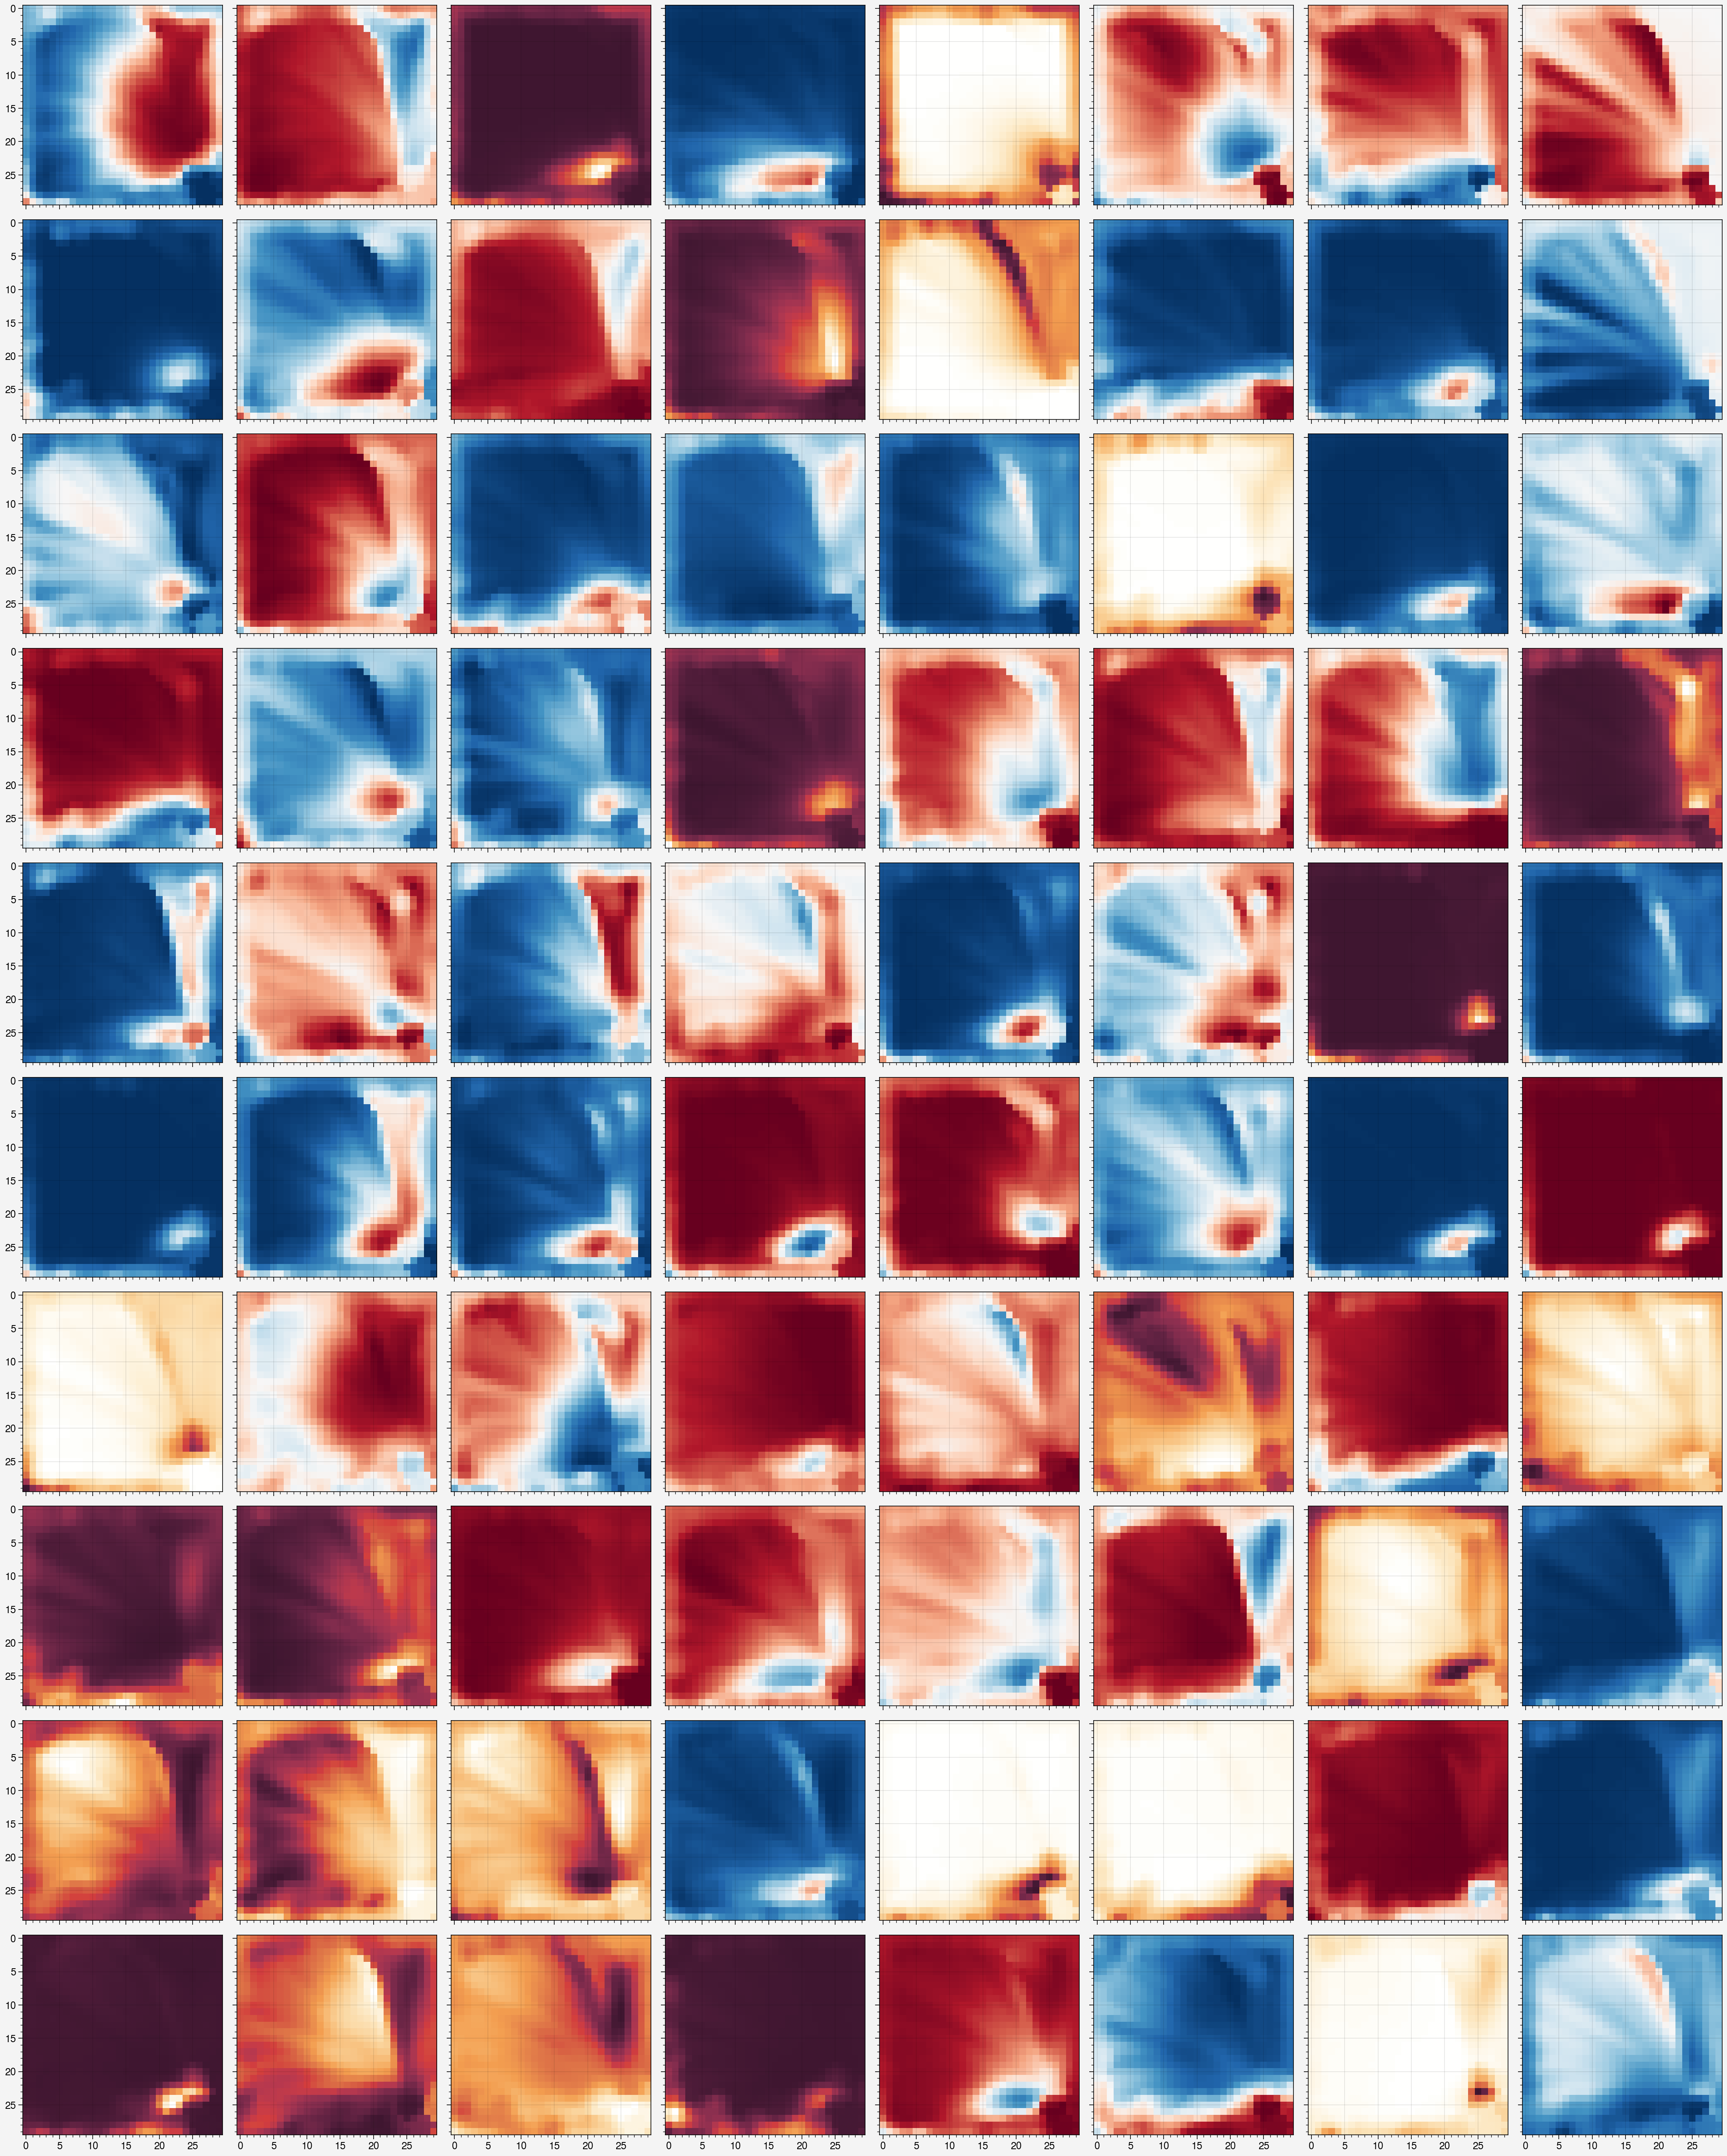

In [123]:
fig, ax = pplt.subplots(ncols=8, nrows=10)

activ_types = ['shared', 'actor', 'critic']

cur_row = 0
for a in activ_types:
    hms = activ_heatmaps[a]
    for i in range(len(hms)):
        for j, hm in enumerate(hms[i]):
            ax[cur_row, j%8].imshow(hm)
            if (j%8) == 7:
                cur_row += 1

# Heatmaps for 4Wall

In [125]:
batch = 32
aux = 'wall01'
data_folder = 'data/4wall_batchaux_heatmap/'
data = pickle.load(open(f'{data_folder}nav_4wall_batch{batch}aux{aux}_checkpoint', 'rb'))



In [126]:
activ_types = ['shared_activations', 'actor_activations', 'critic_activations']
trial = 0
chk = 900

activ_heatmaps = {}

for activ_type in activ_types:
    activ_heatmaps[activ_type.split('_')[0]] = []
    
    activ = data['copied'][trial][chk]['activations'][activ_type]
    p = data['copied'][trial][chk]['data']['pos']
    
    num_layers = activ.shape[0]
    
    for layer in tqdm(range(num_layers)):
        a = activ[layer]
        heatmaps = []
        for i in range(a.shape[1]):
            heatmap = gaussian_smooth(p, a[:, i])
            heatmaps.append(heatmap)
            
        activ_heatmaps[activ_type.split('_')[0]].append(heatmaps)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.38s/it]


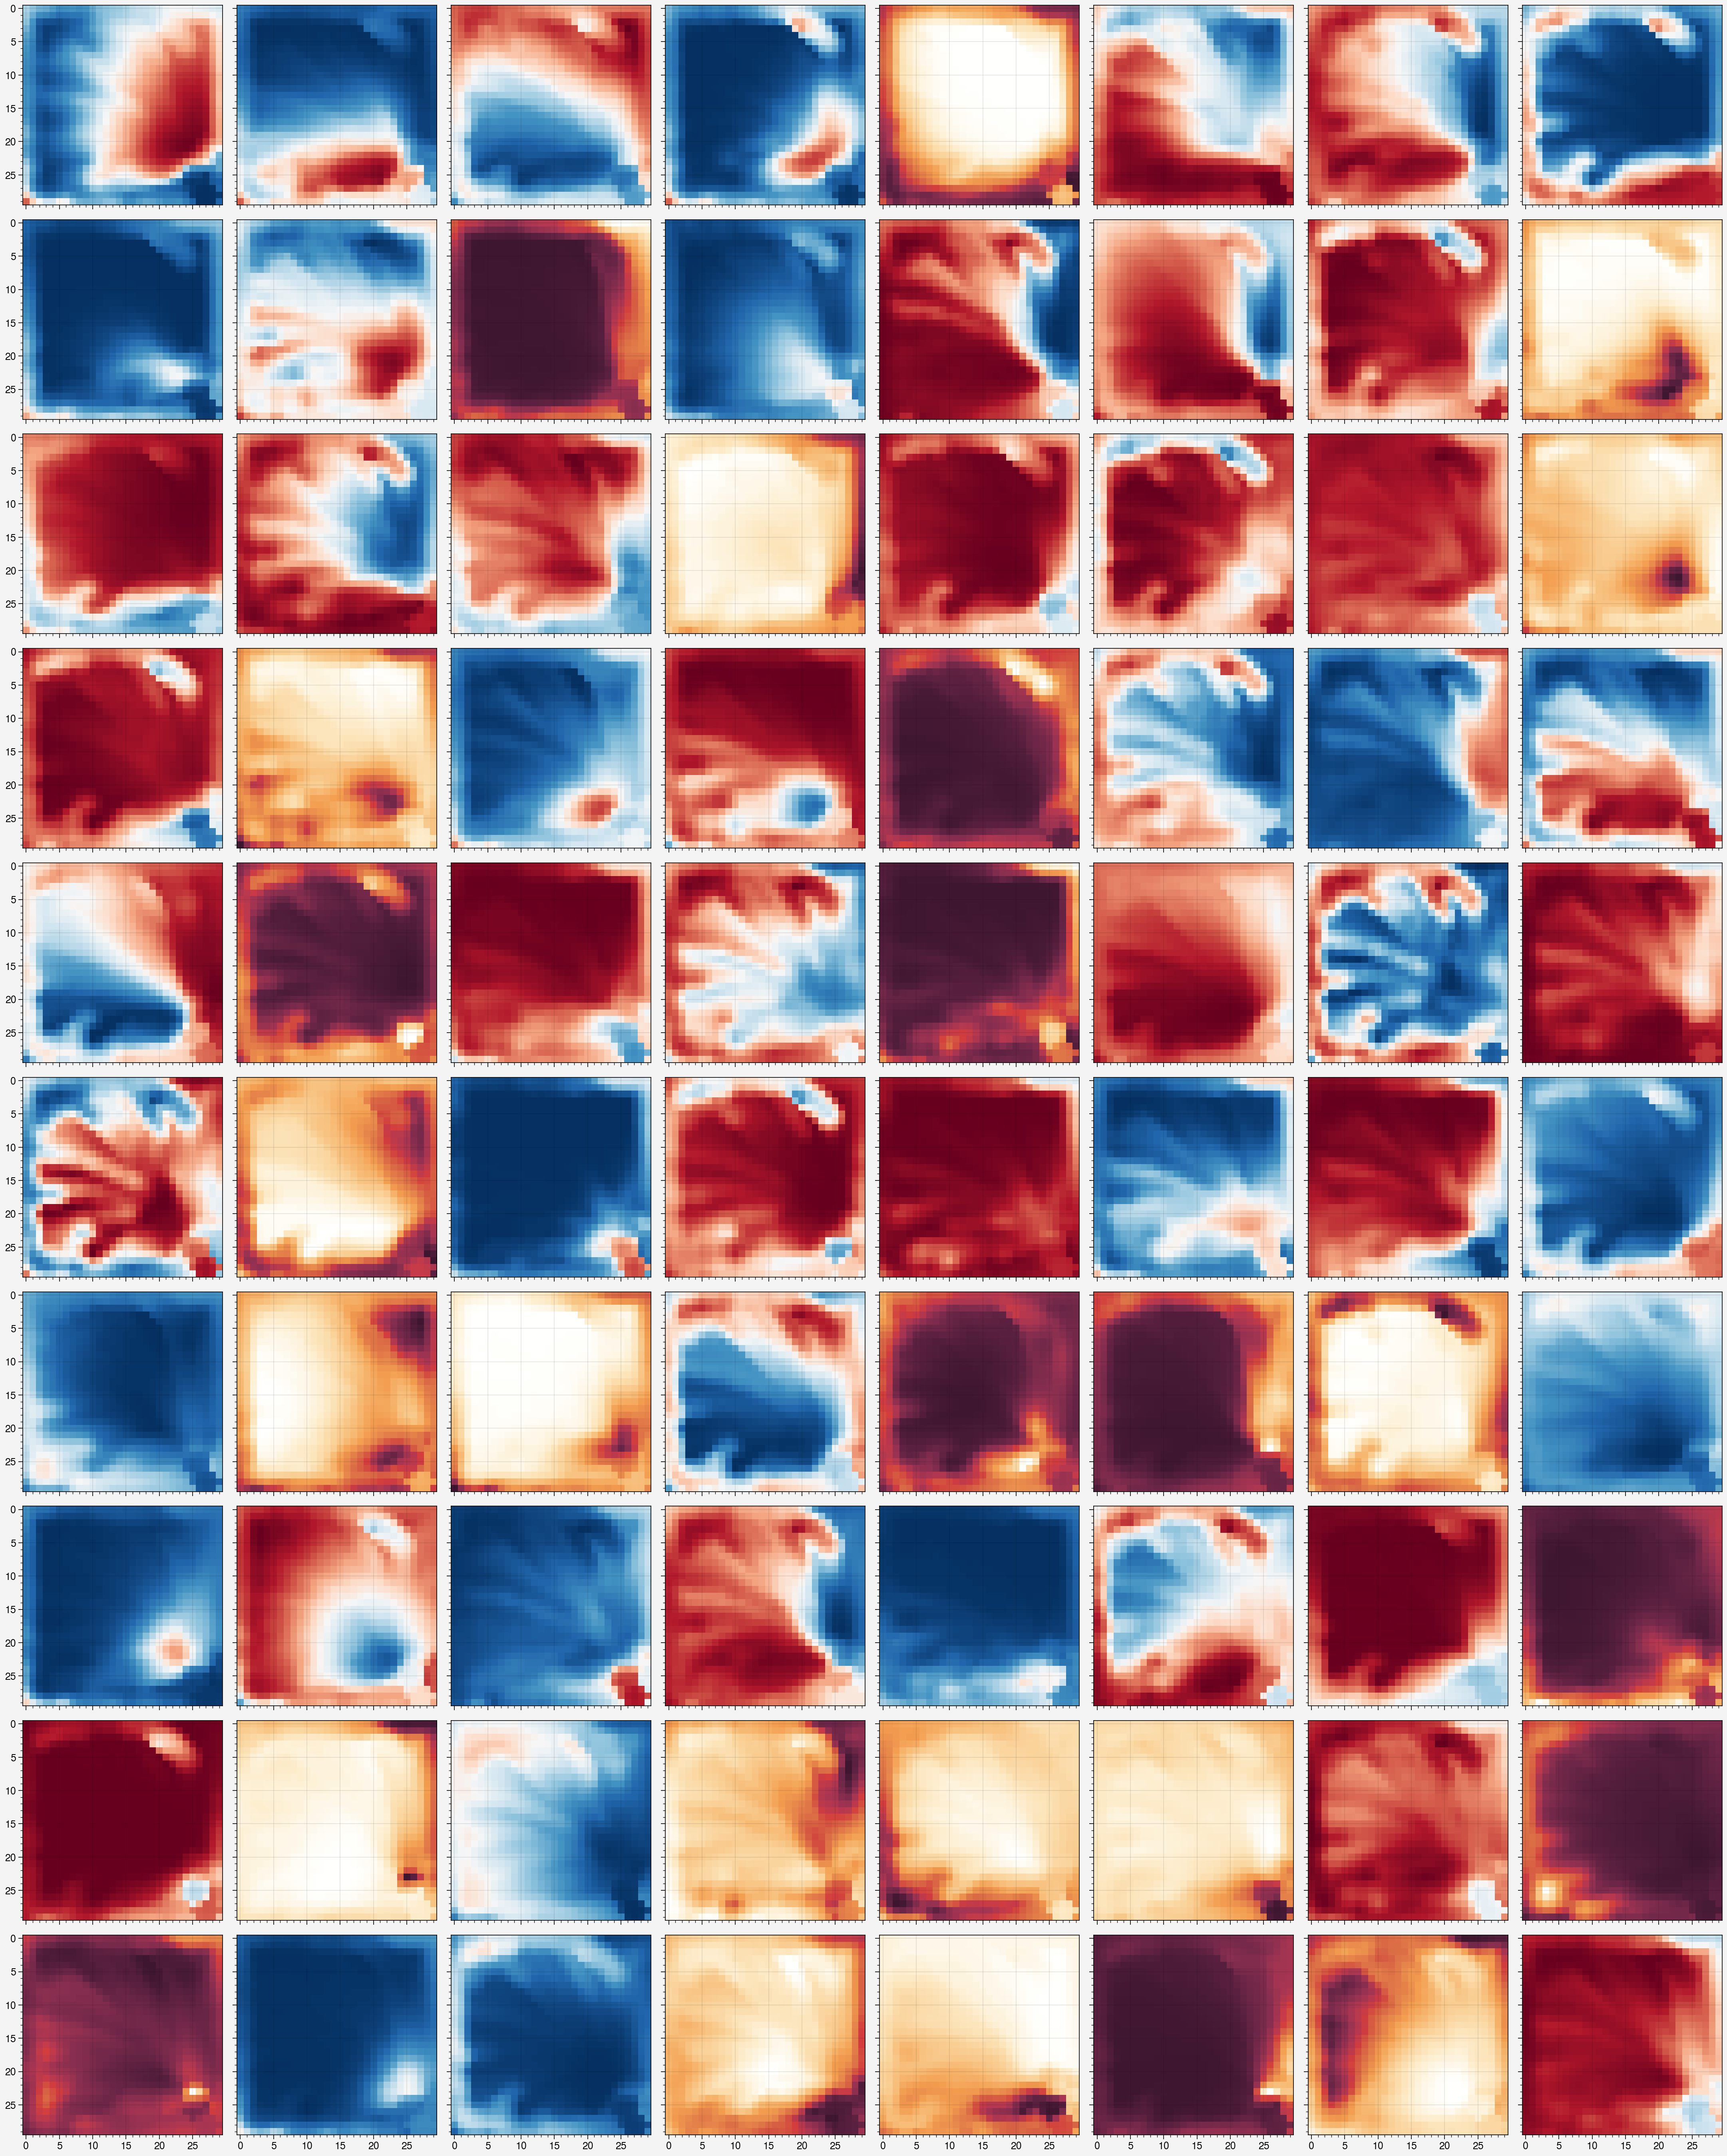

In [127]:
fig, ax = pplt.subplots(ncols=8, nrows=10)

activ_types = ['shared', 'actor', 'critic']

cur_row = 0
for a in activ_types:
    hms = activ_heatmaps[a]
    for i in range(len(hms)):
        for j, hm in enumerate(hms[i]):
            ax[cur_row, j%8].imshow(hm)
            if (j%8) == 7:
                cur_row += 1

In [131]:
activ_types = ['shared_activations', 'actor_activations', 'critic_activations']
trial = 0
chk = 900

activ_heatmaps = {}

for activ_type in activ_types:
    activ_heatmaps[activ_type.split('_')[0]] = []
    
    activ = data['random'][trial][chk]['activations'][activ_type]
    p = data['random'][trial][chk]['data']['pos']
    
    num_layers = activ.shape[0]
    
    for layer in tqdm(range(num_layers)):
        a = activ[layer]
        heatmaps = []
        for i in range(a.shape[1]):
            heatmap = gaussian_smooth(p, a[:, i], sigma=20)
            heatmaps.append(heatmap)
            
        activ_heatmaps[activ_type.split('_')[0]].append(heatmaps)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.19s/it]


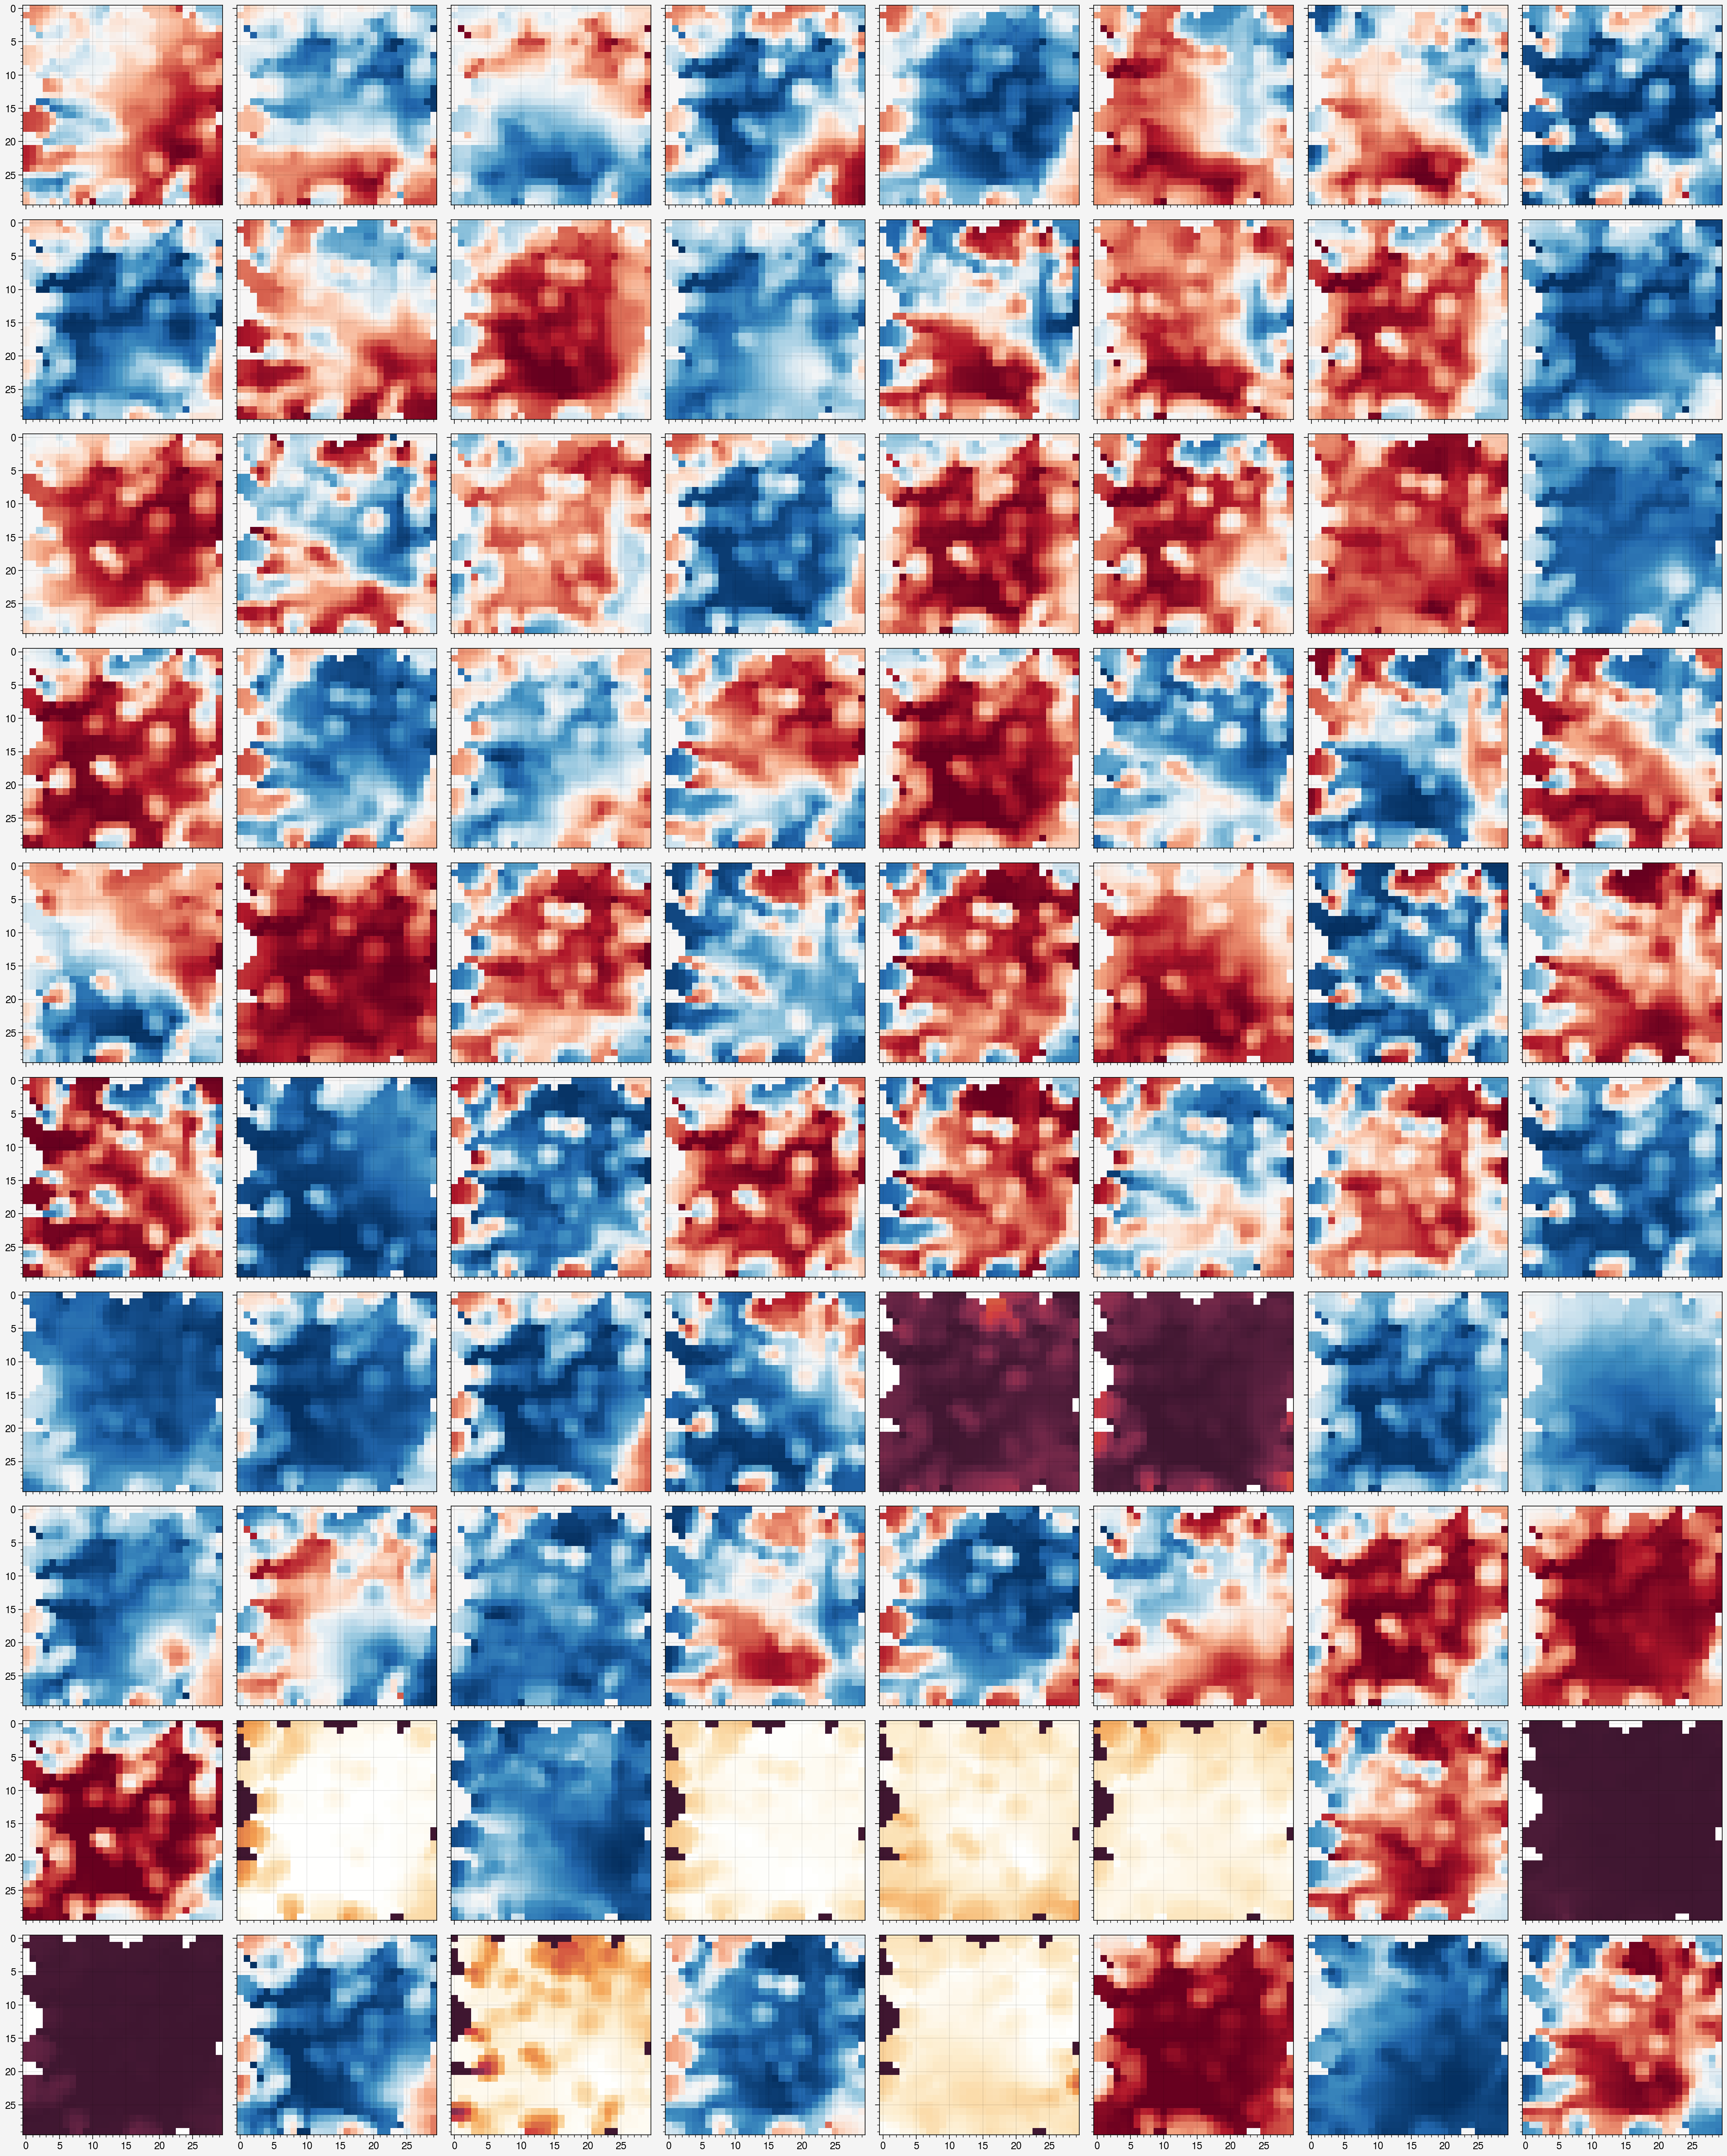

In [130]:
fig, ax = pplt.subplots(ncols=8, nrows=10)

activ_types = ['shared', 'actor', 'critic']

cur_row = 0
for a in activ_types:
    hms = activ_heatmaps[a]
    for i in range(len(hms)):
        for j, hm in enumerate(hms[i]):
            ax[cur_row, j%8].imshow(hm)
            if (j%8) == 7:
                cur_row += 1

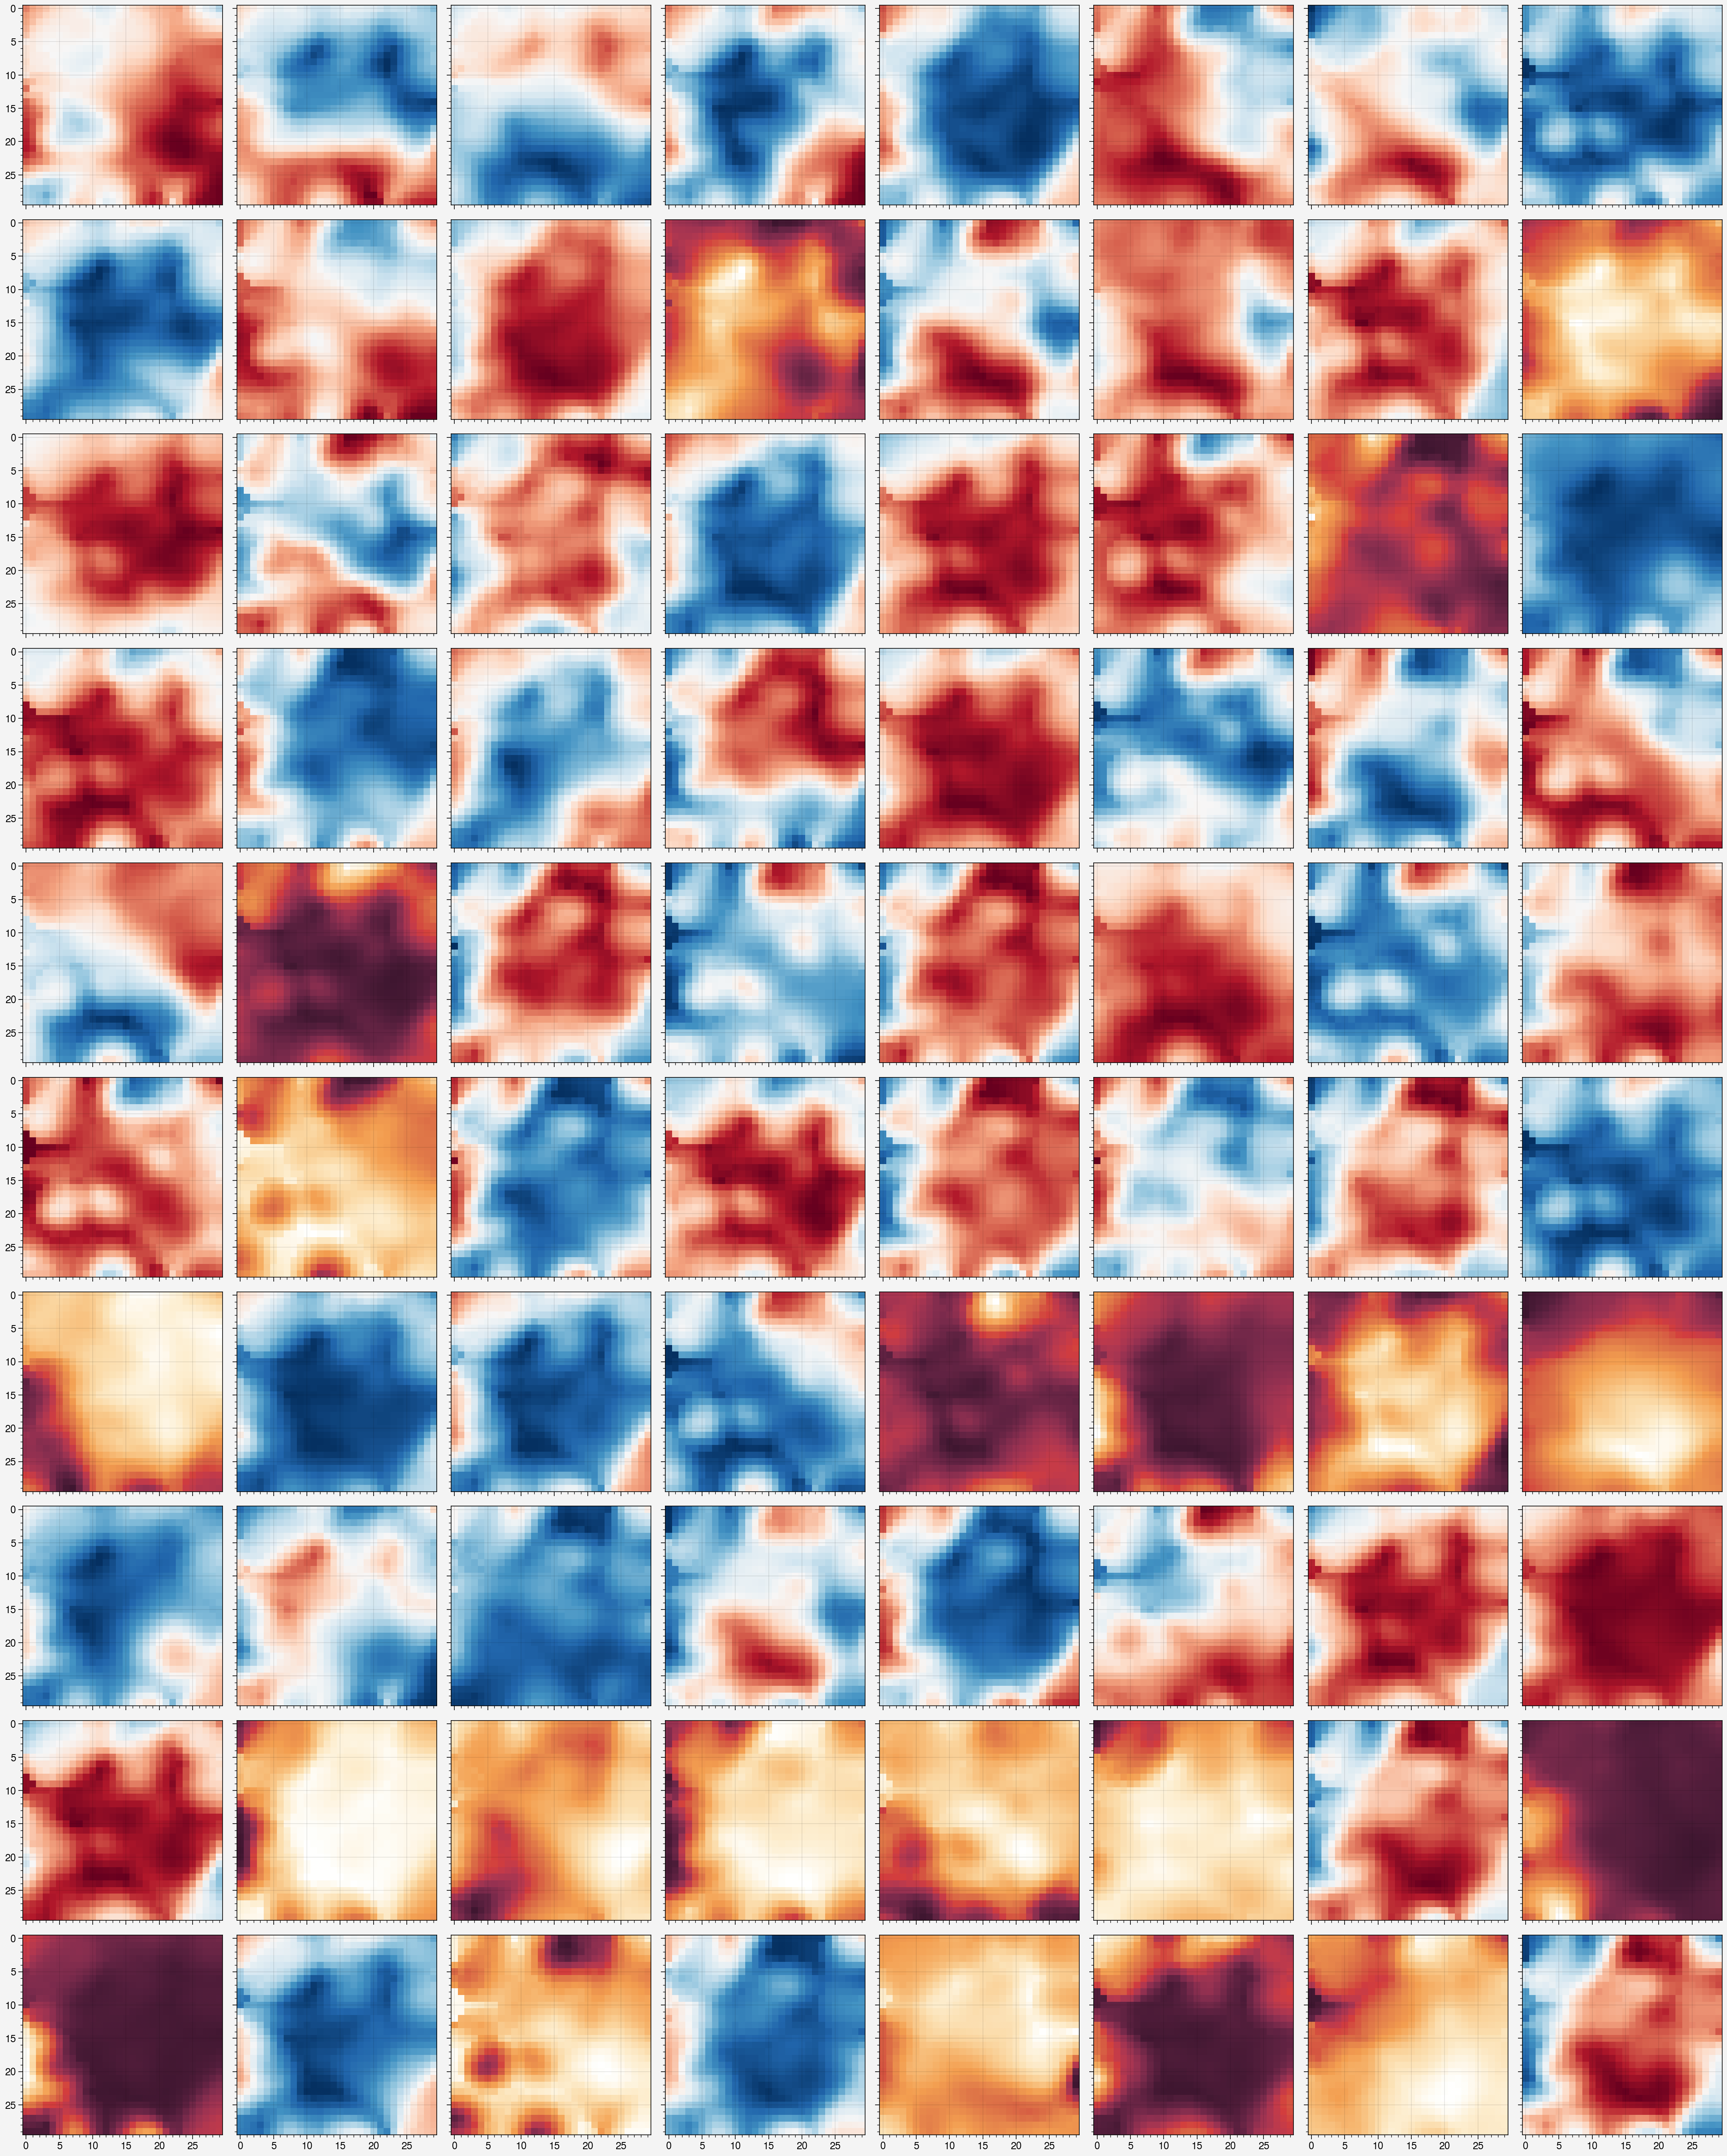

In [132]:
fig, ax = pplt.subplots(ncols=8, nrows=10)

activ_types = ['shared', 'actor', 'critic']

cur_row = 0
for a in activ_types:
    hms = activ_heatmaps[a]
    for i in range(len(hms)):
        for j, hm in enumerate(hms[i]):
            ax[cur_row, j%8].imshow(hm)
            if (j%8) == 7:
                cur_row += 1

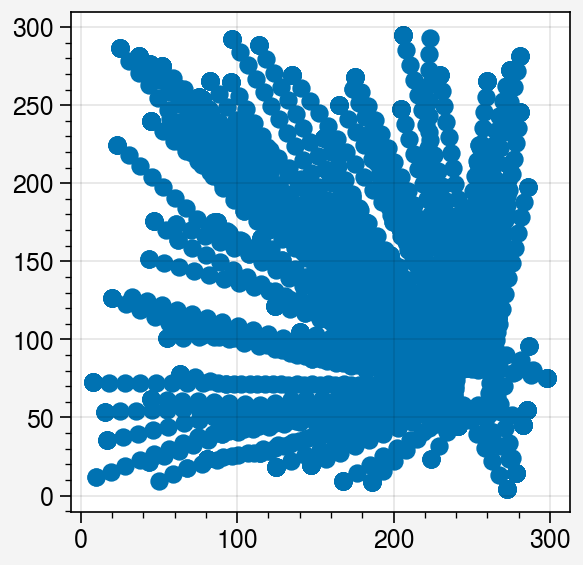

In [129]:
fig, ax = pplt.subplots()
ax.scatter(p.T[0], p.T[1])